In [1]:
import sys
sys.path.insert(0, '../code')

In [2]:
import csv
import numpy as np
import pandas as pd
from custom_model import Net_2
from train_custom import evaluate
from test_dataset import TestDataset
import torch
from torchvision.io import read_image
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from pathlib import Path

/home/diego/miniconda3/envs/HoMLChallenge/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from predict import load_model_effnet, load_model_scratch

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # automatically select on what device to run the code


In [5]:
model = load_model_scratch()

In [6]:
model = model.to(device)

In [7]:
def get_feature_map(category, number, n=None):
    image_path = f'../data/new_data/train/{category}/train_{number}.png'
    img = read_image(image_path)/255.
    img = img.to(device).float().unsqueeze(0)
    with torch.no_grad():
        features = model.features(img)
    features = features[0].cpu().numpy()
    features = features/features.max()
    if n:
        return features[n]
    return features

In [8]:
def feature_map(category, number):
    features = get_feature_map(category, number)
    fig, axes = plt.subplots(7, 7, figsize=(20,20))
    for n, (feature_map, ax) in enumerate(zip(features, axes.flatten())):
        ax.imshow(feature_map)
        ax.set_title(str(n))
        ax.axis('off')
    for ax in axes.flatten()[-5:]:
        ax.axis('off')
    return fig

In [14]:
candidate_dict = {
    "river": [1985, 1868, 1402, 1526, 3368, 1573, 1585, 3601, 3648], 
    "island": [1665, 1882],
    "cloud": [361, 464, 863, 1002, 1110, 1248,2282],
    "mountain": [1848, 2465, 2547, 3359, 3372, 4001, 944],
    "meadow": [1946],
    "snowberg": [3108]
    }

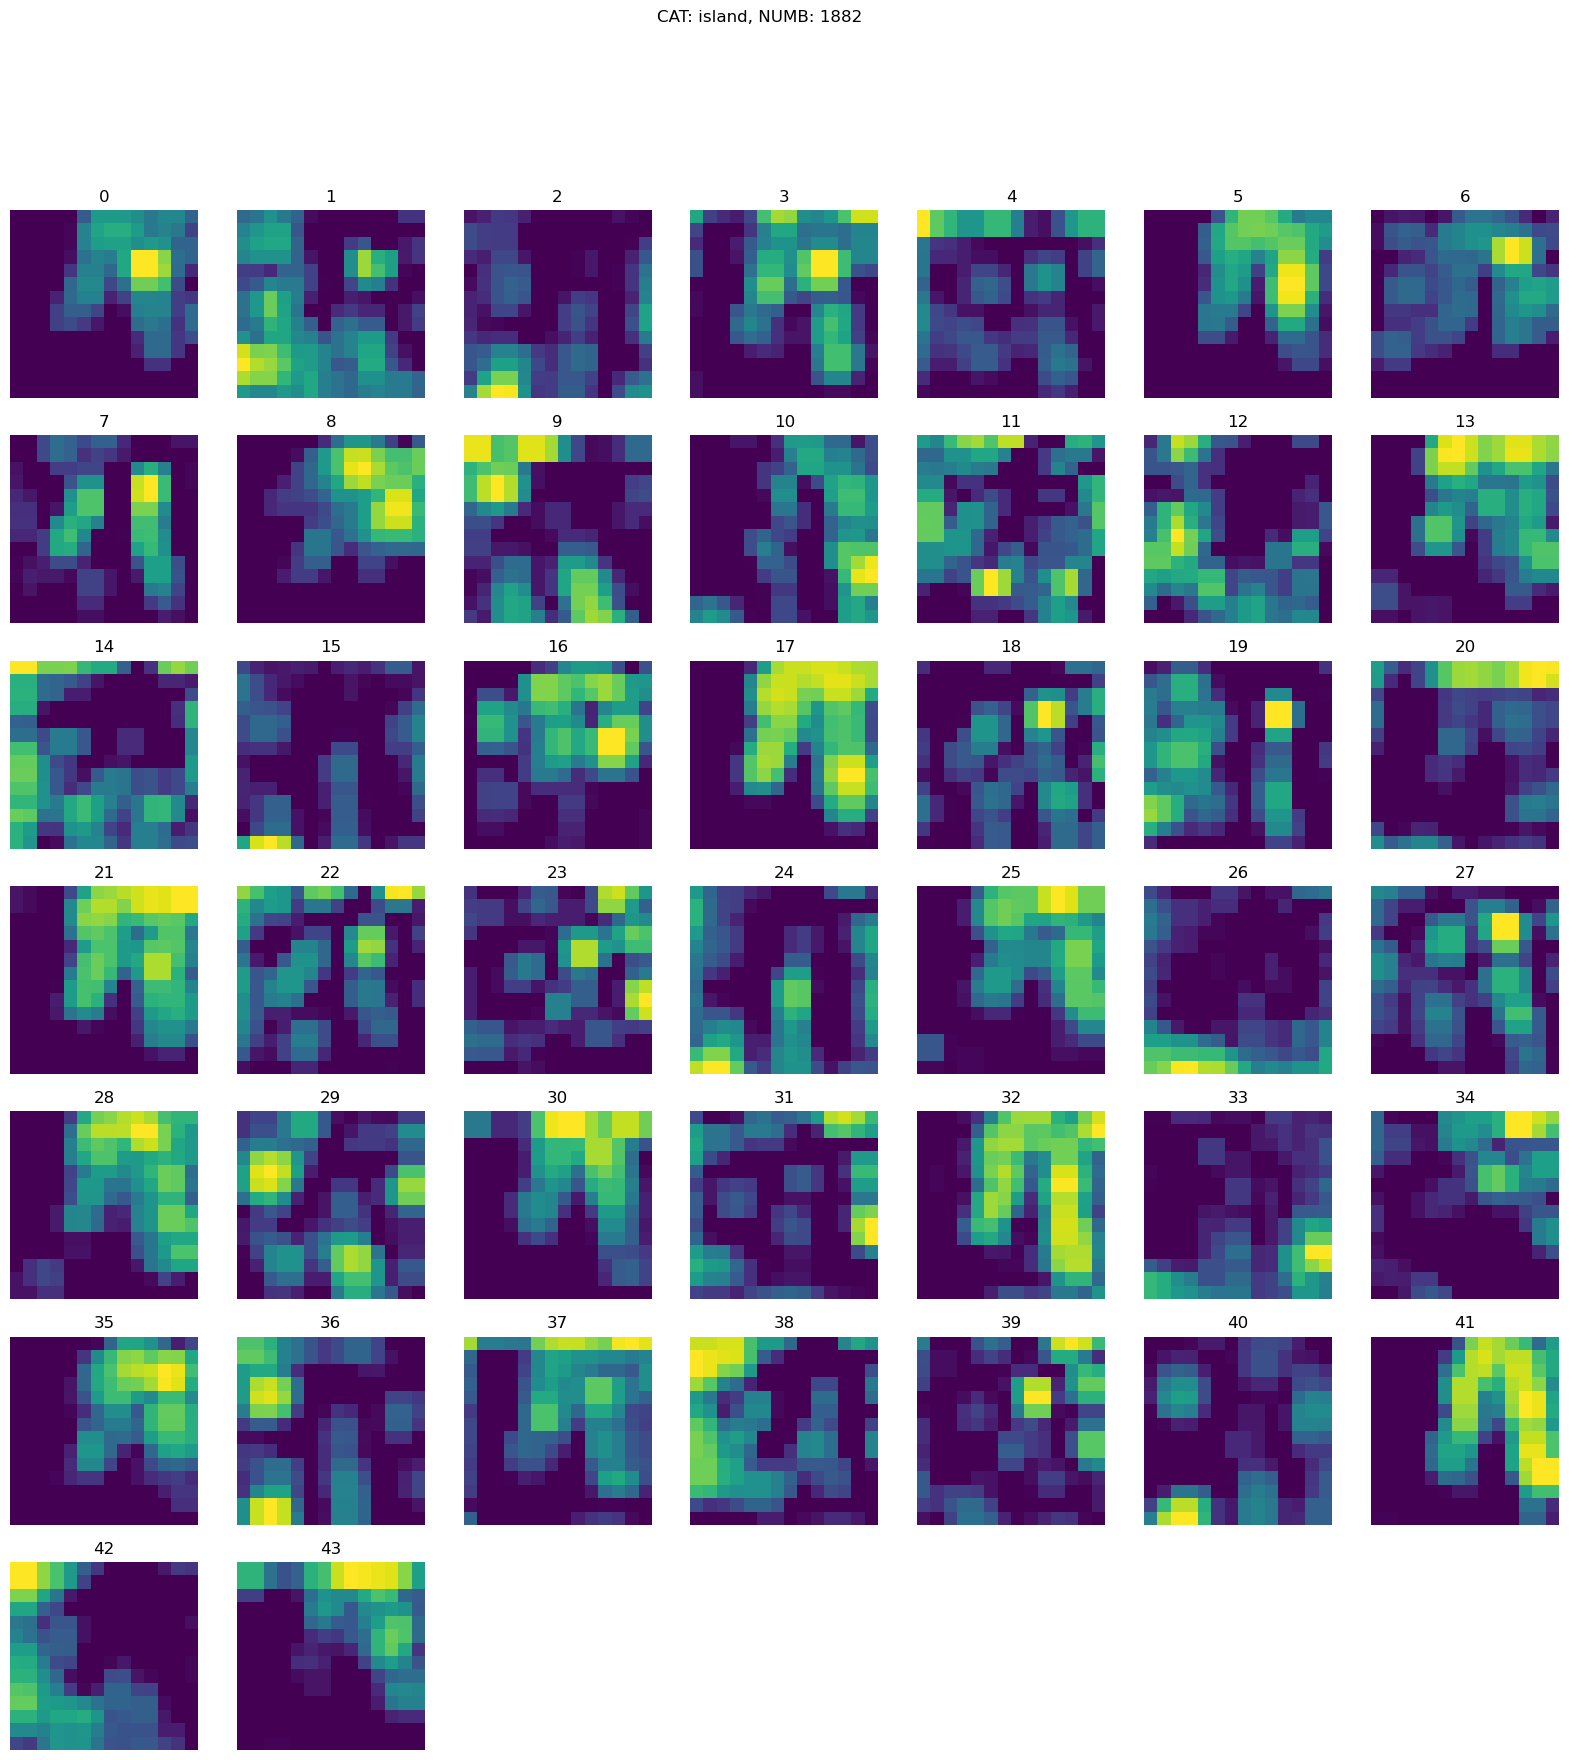

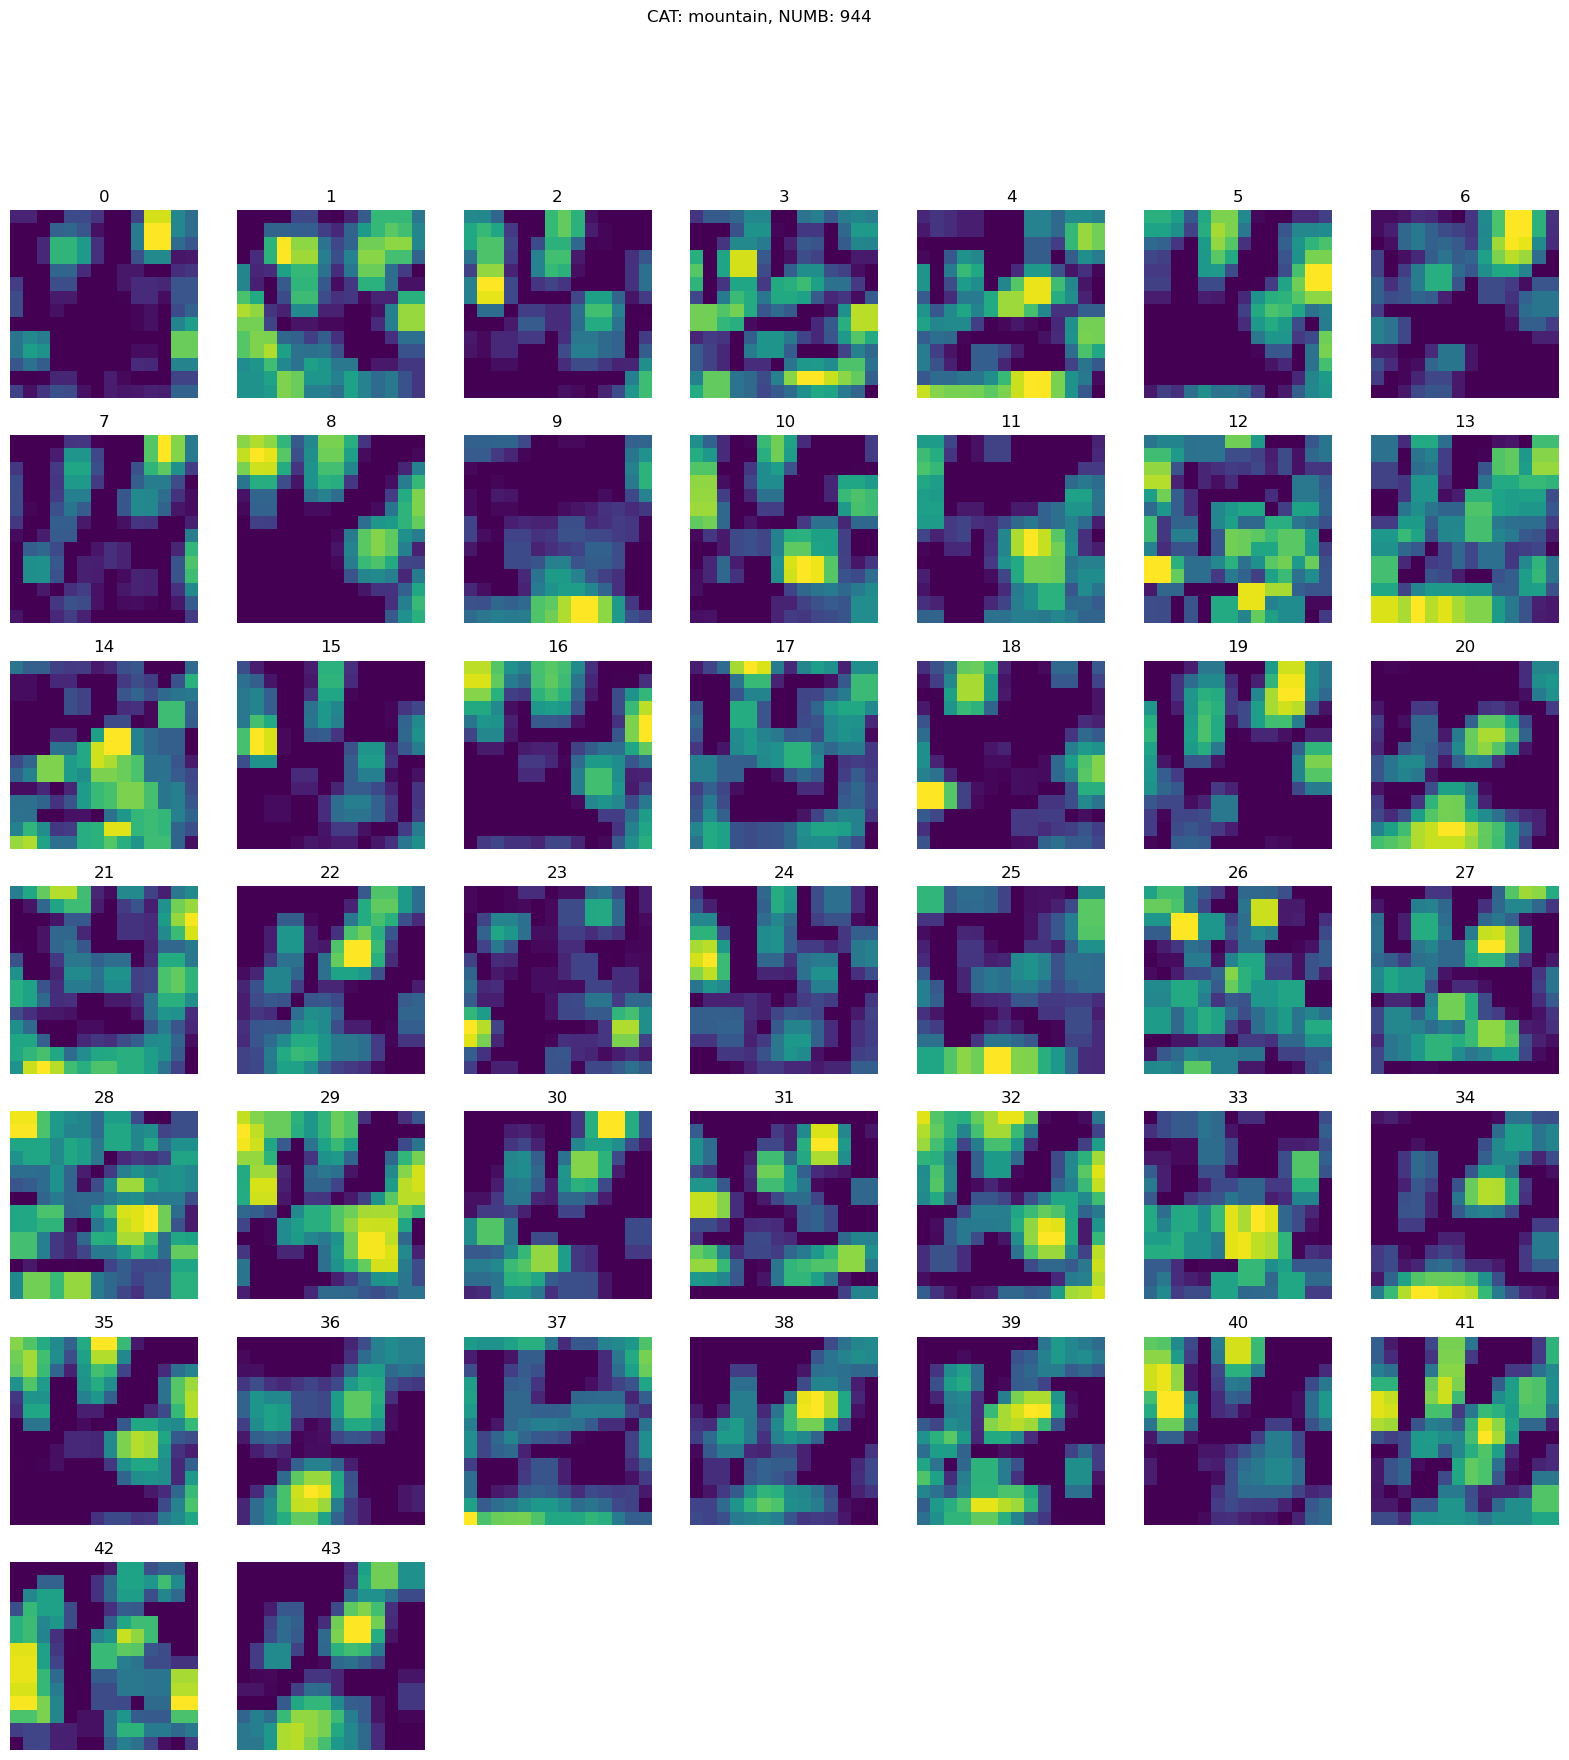

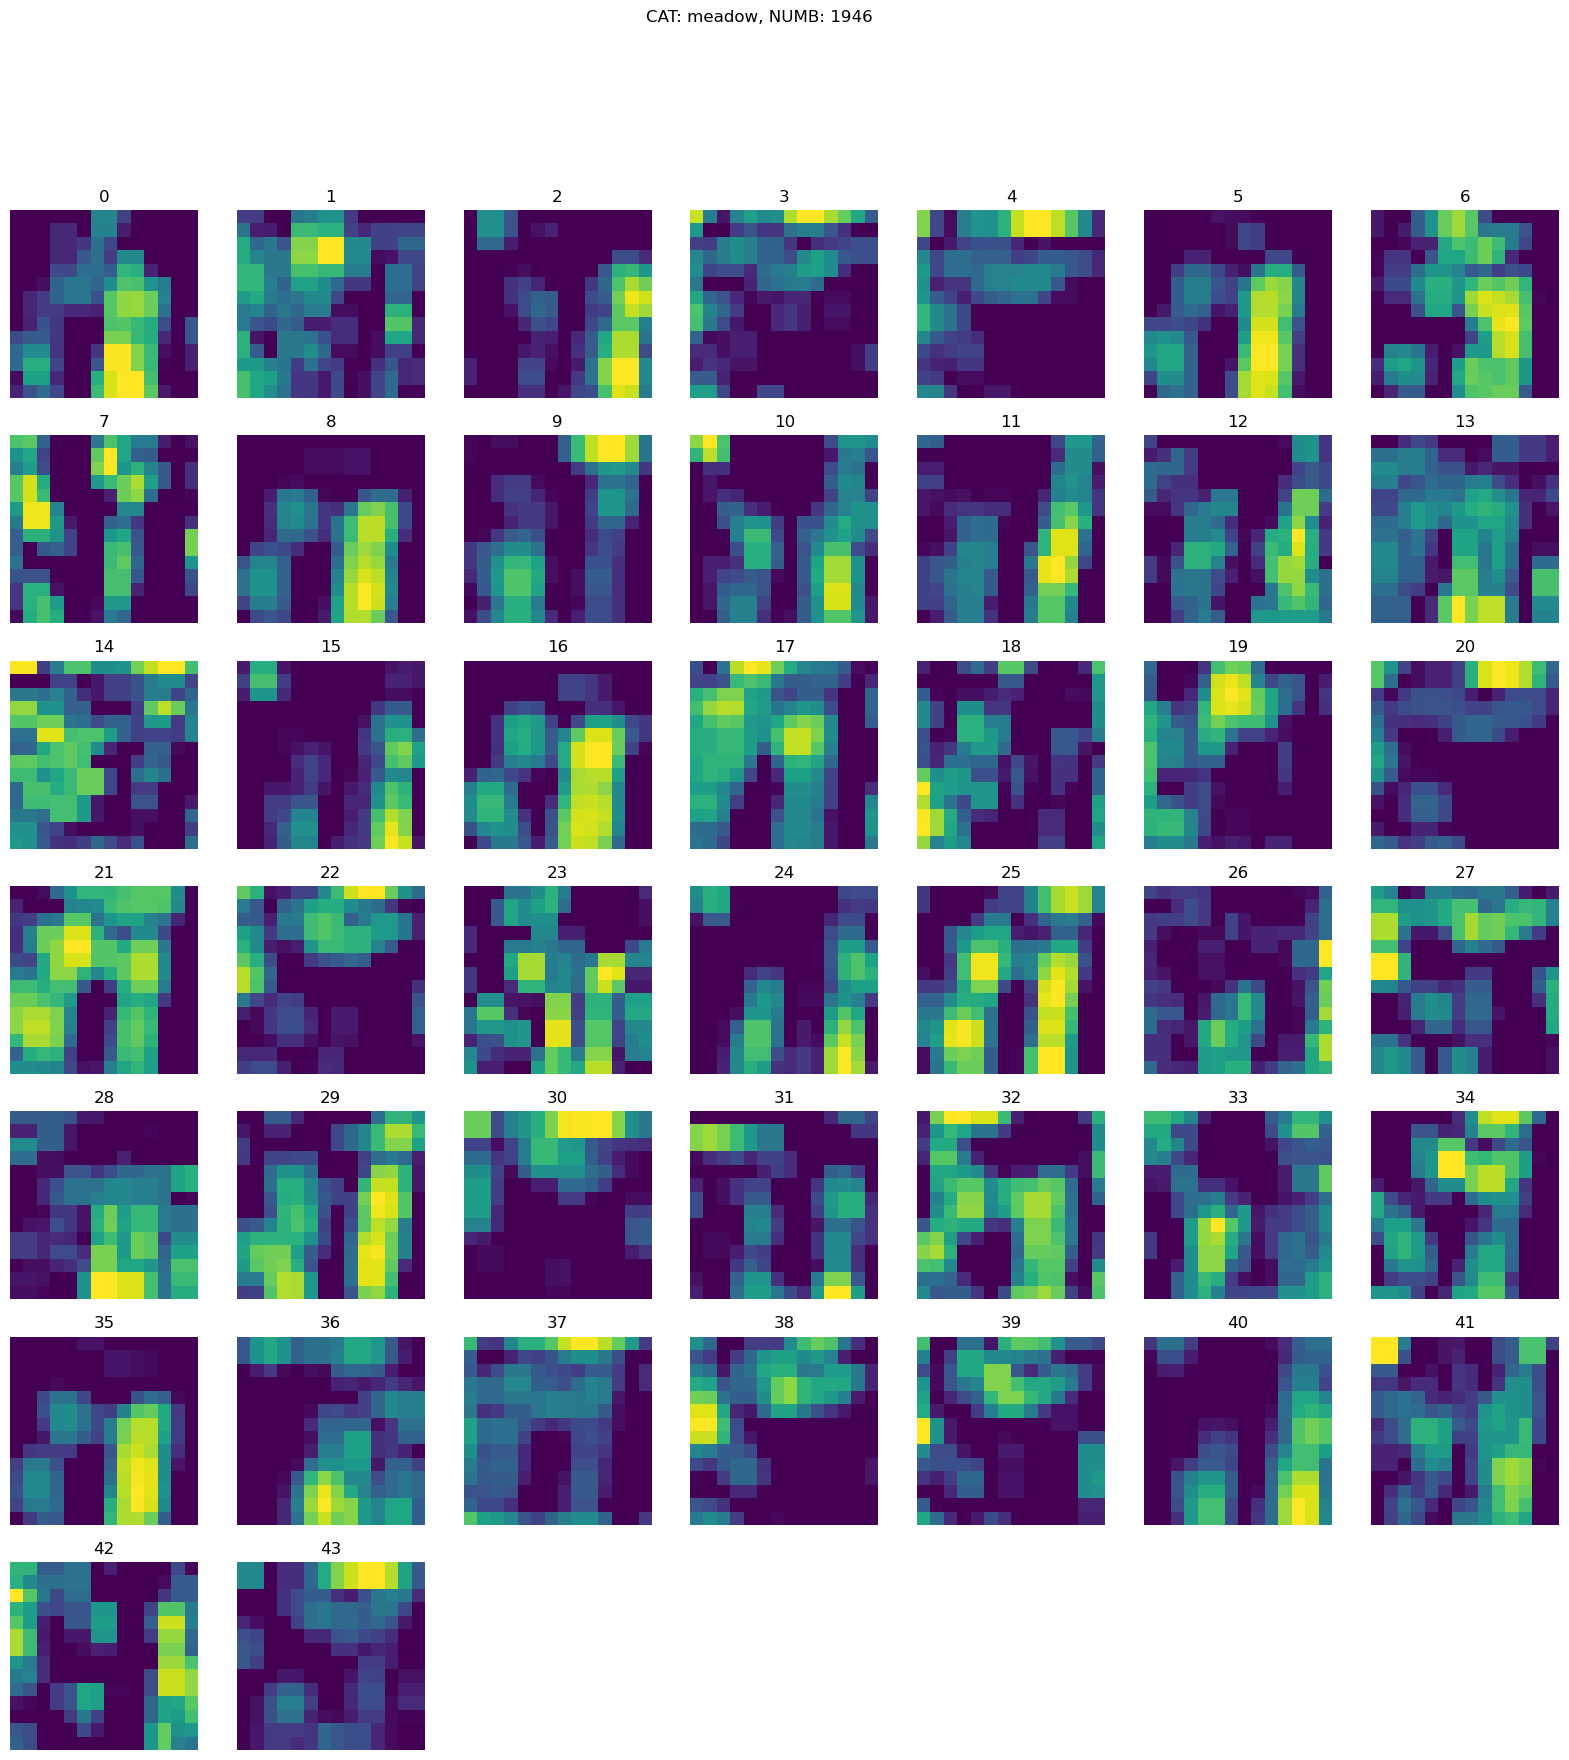

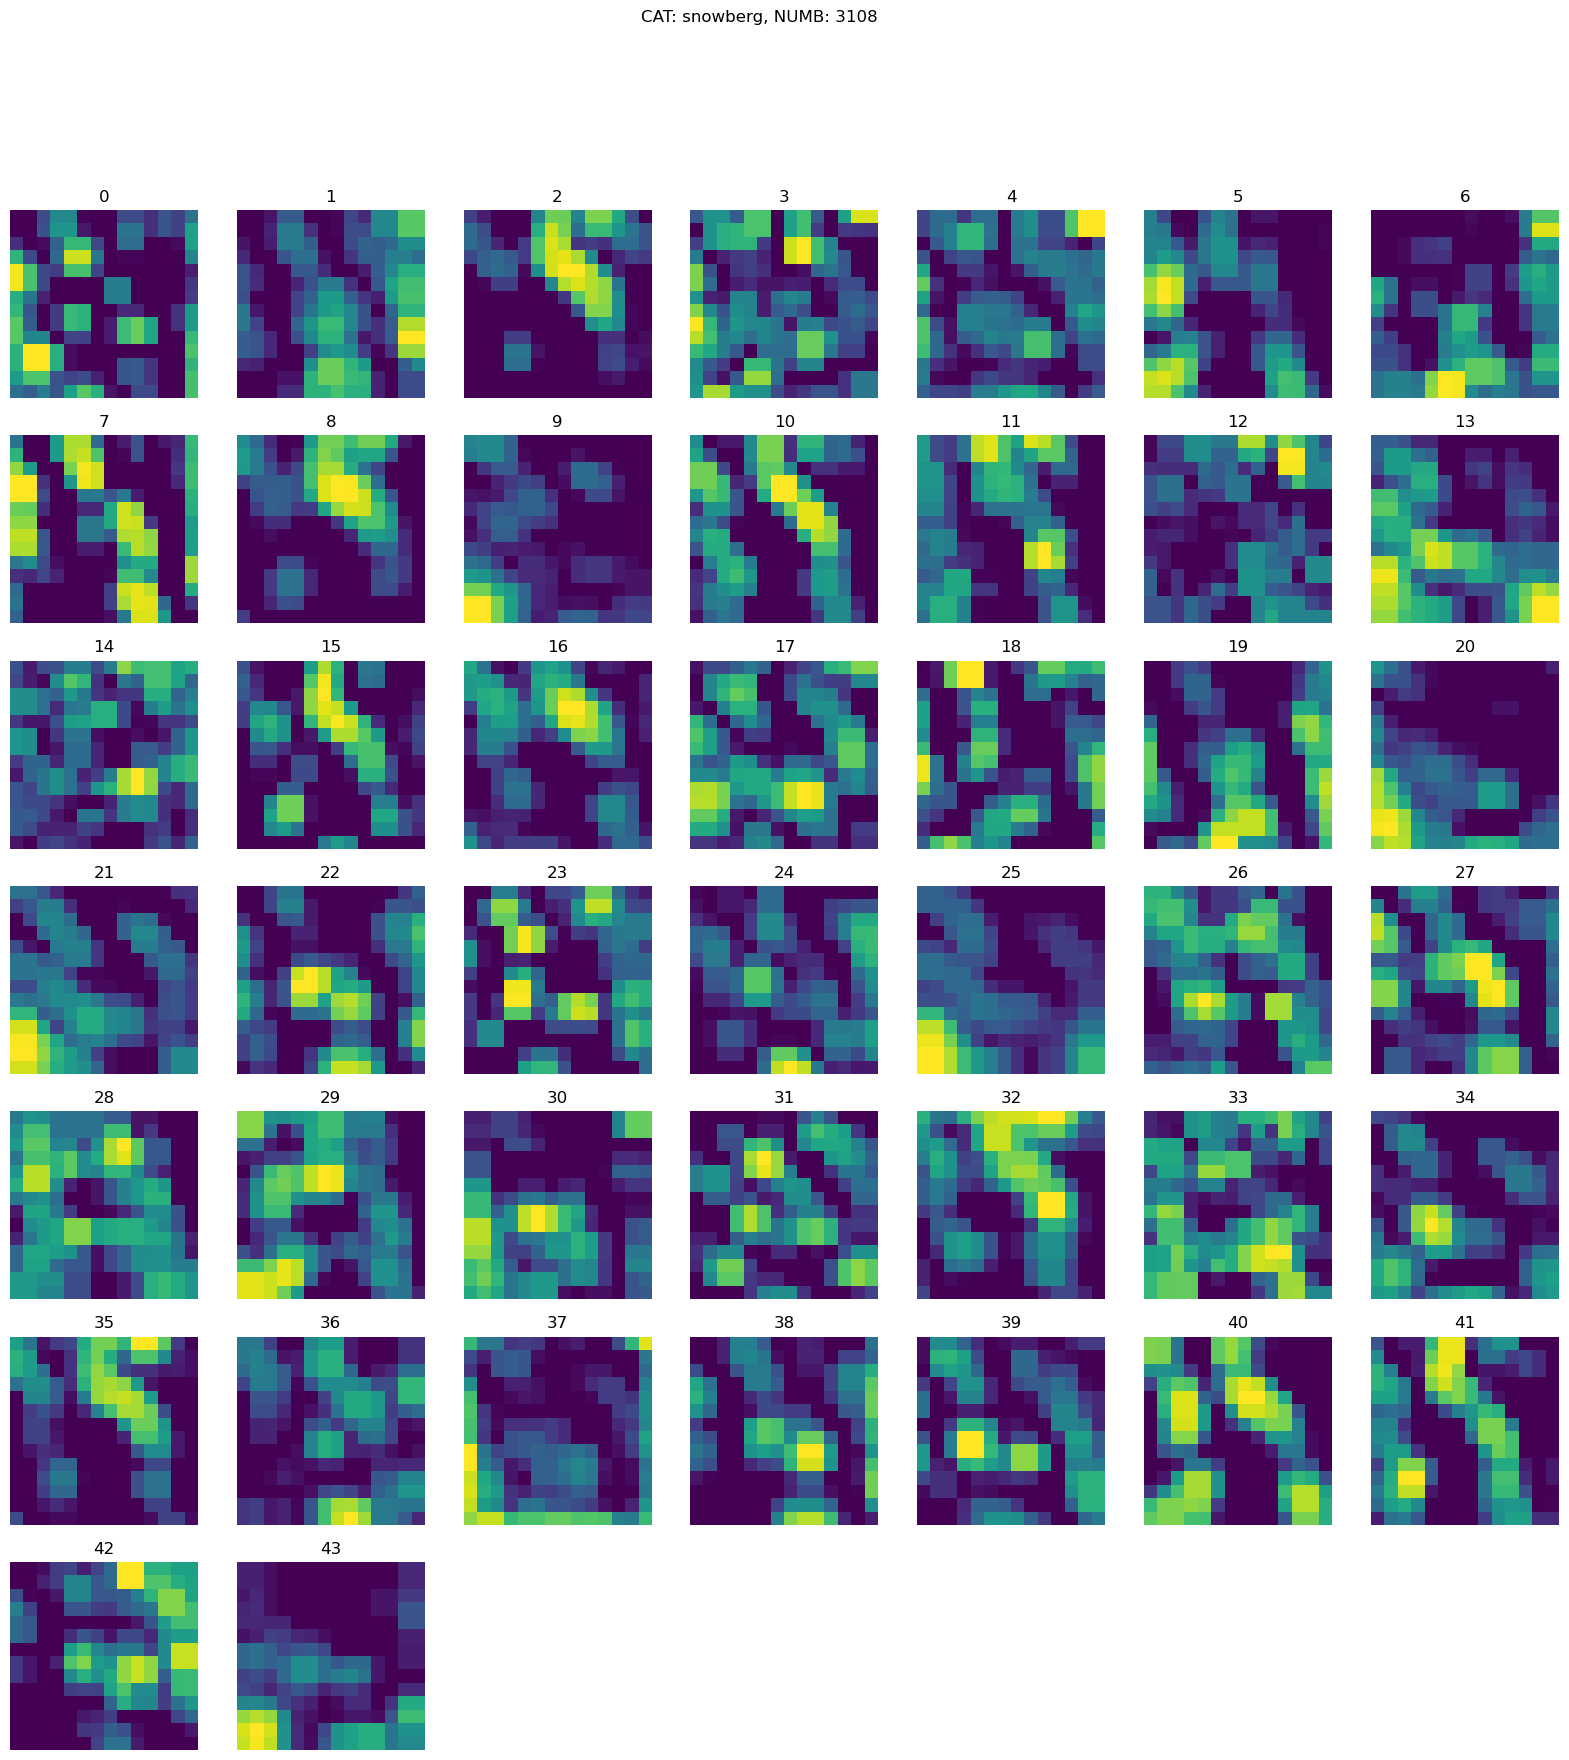

In [15]:
for category, numbers in candidate_dict.items():
    for number in numbers:
        if Path(f'../data/figures/thank_you/{category}_{number}.png').exists():
            continue
        fig = feature_map(category, number)
        fig.suptitle(f'CAT: {category}, NUMB: {number}')
        fig.savefig(f'../data/figures/thank_you/{category}_{number}.png')

In [16]:
thank_you_dict = {
    "t": ['river', 3368, 8],
    "h": ['meadow', 1946, 32],
    "a": ['mountain', 2547, 17],
    "n": ['river', 1573, 6],
    "k": ['mountain', 2465, 35],
    "y": ['river', 3648, 35],
    "o": ['island', 1665, 35],
    "u": ['river', 1402, 35],
}

t
h
a
n
k
y
o
u


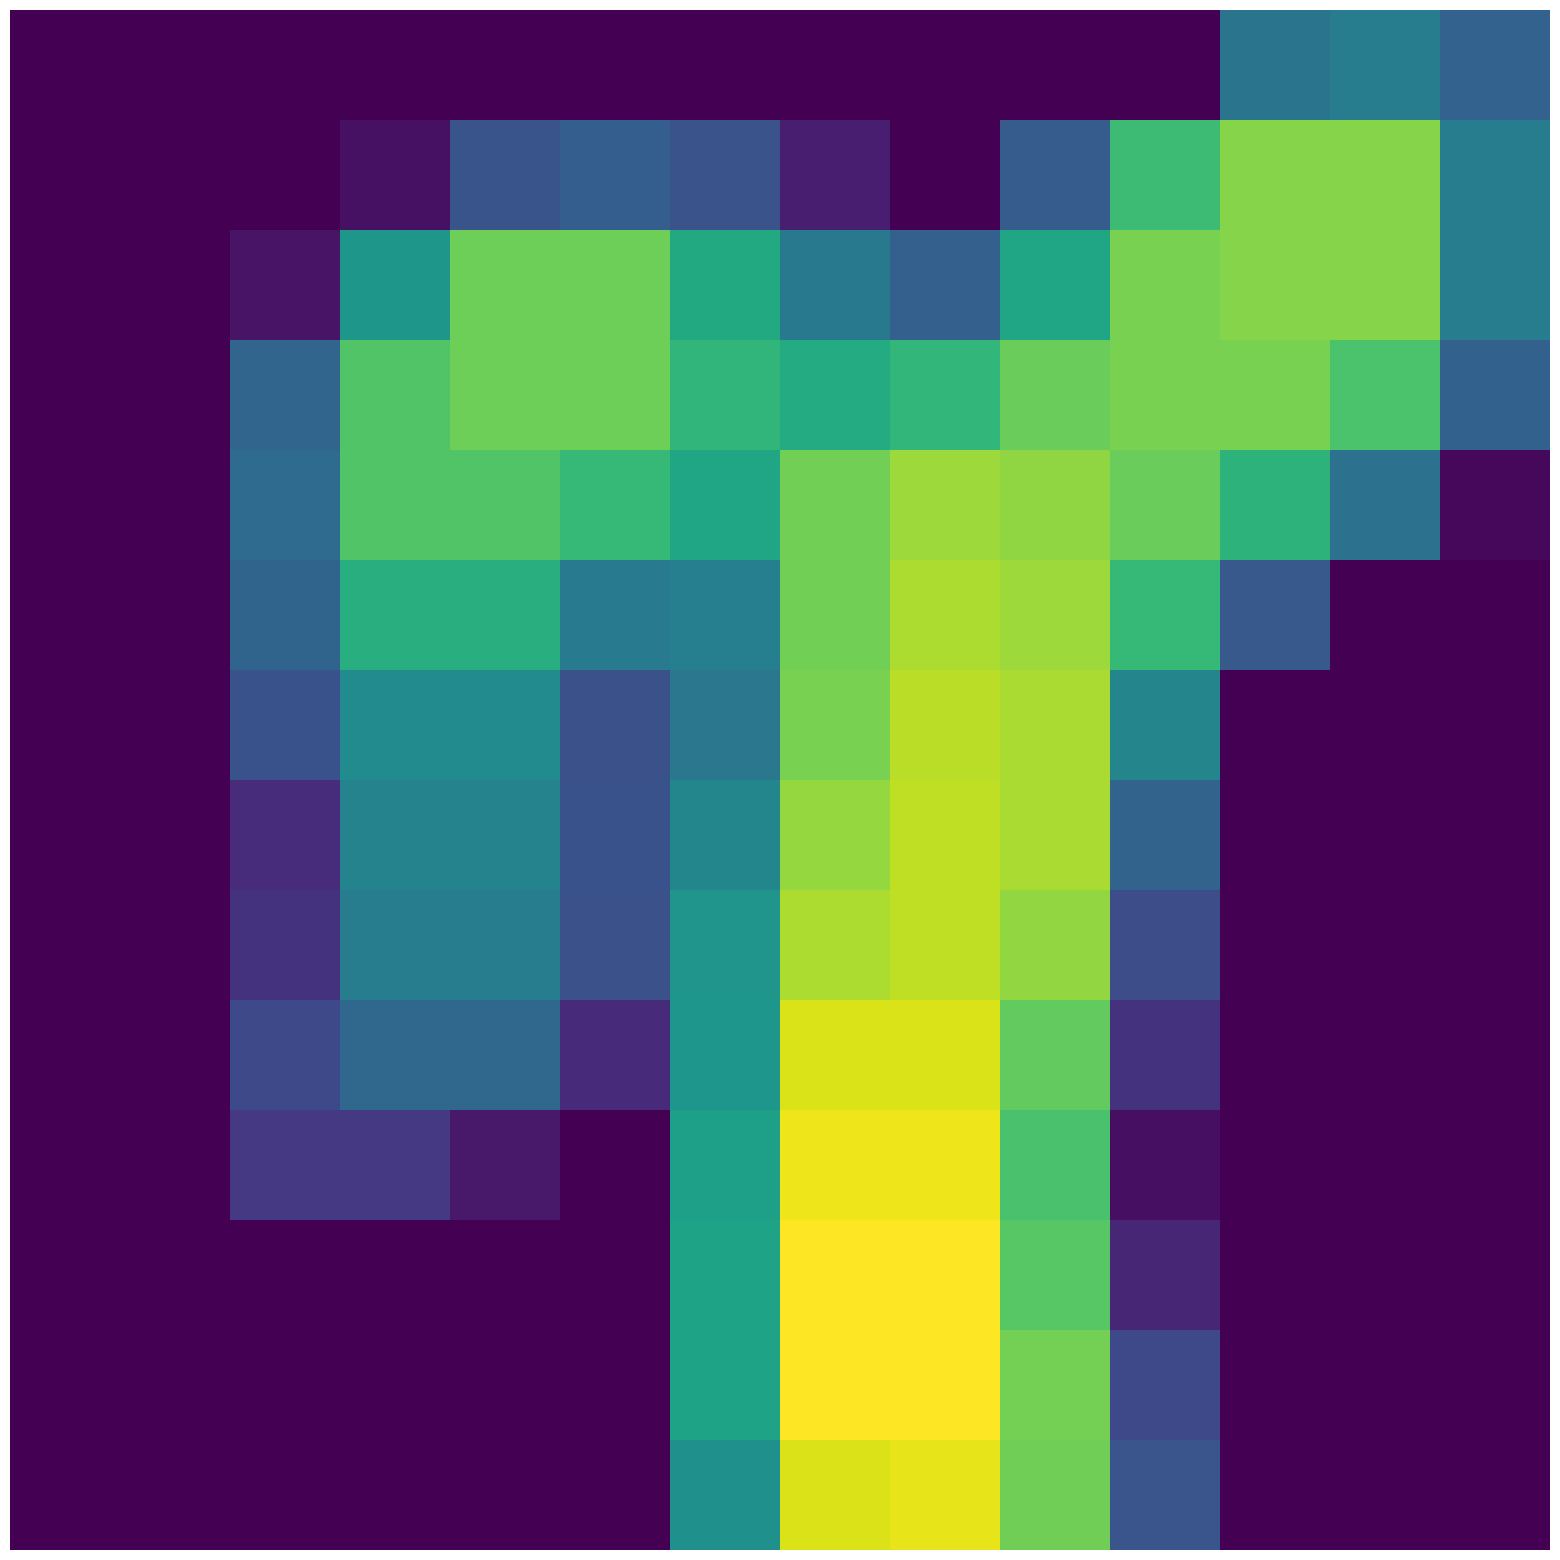

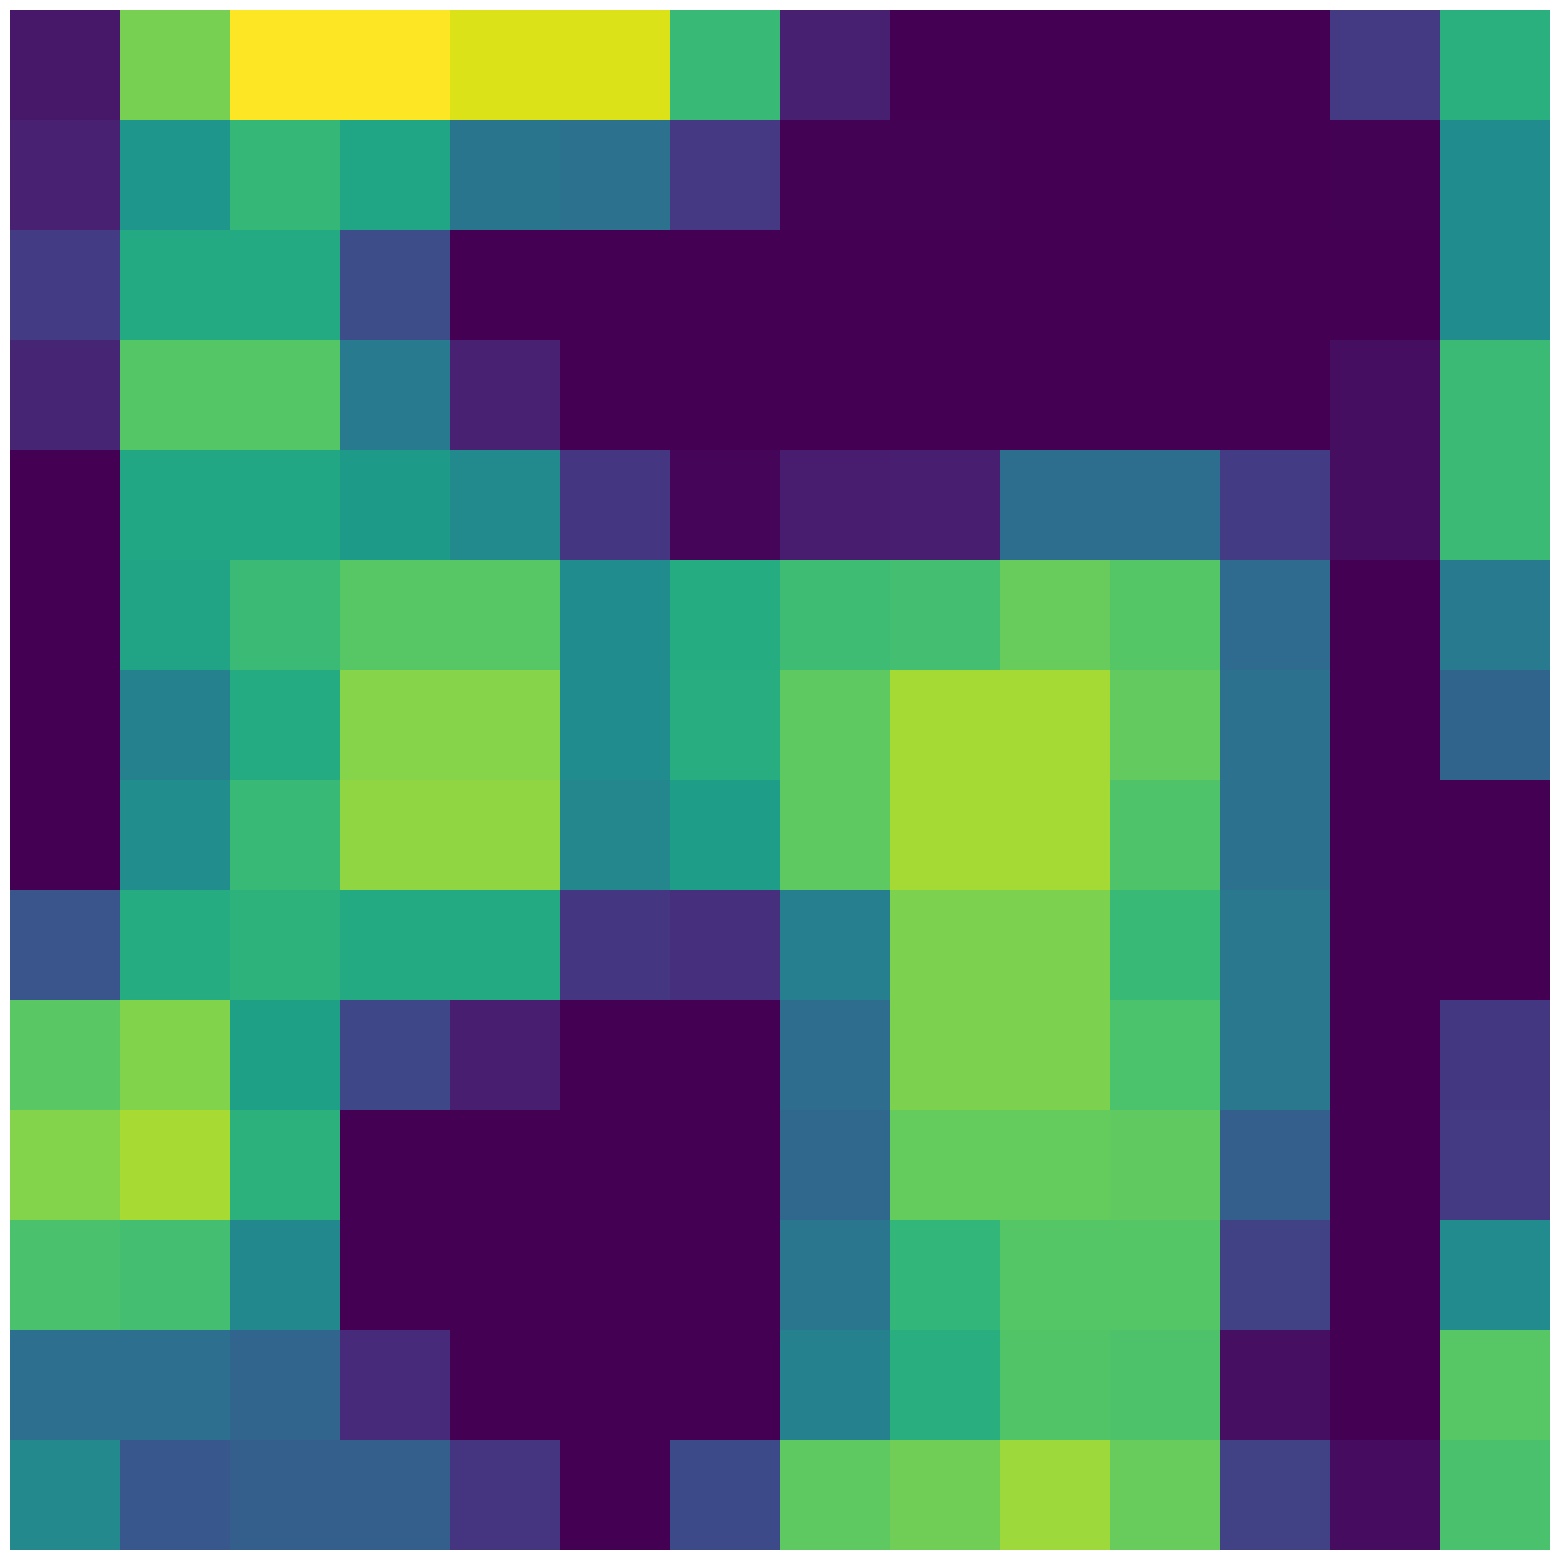

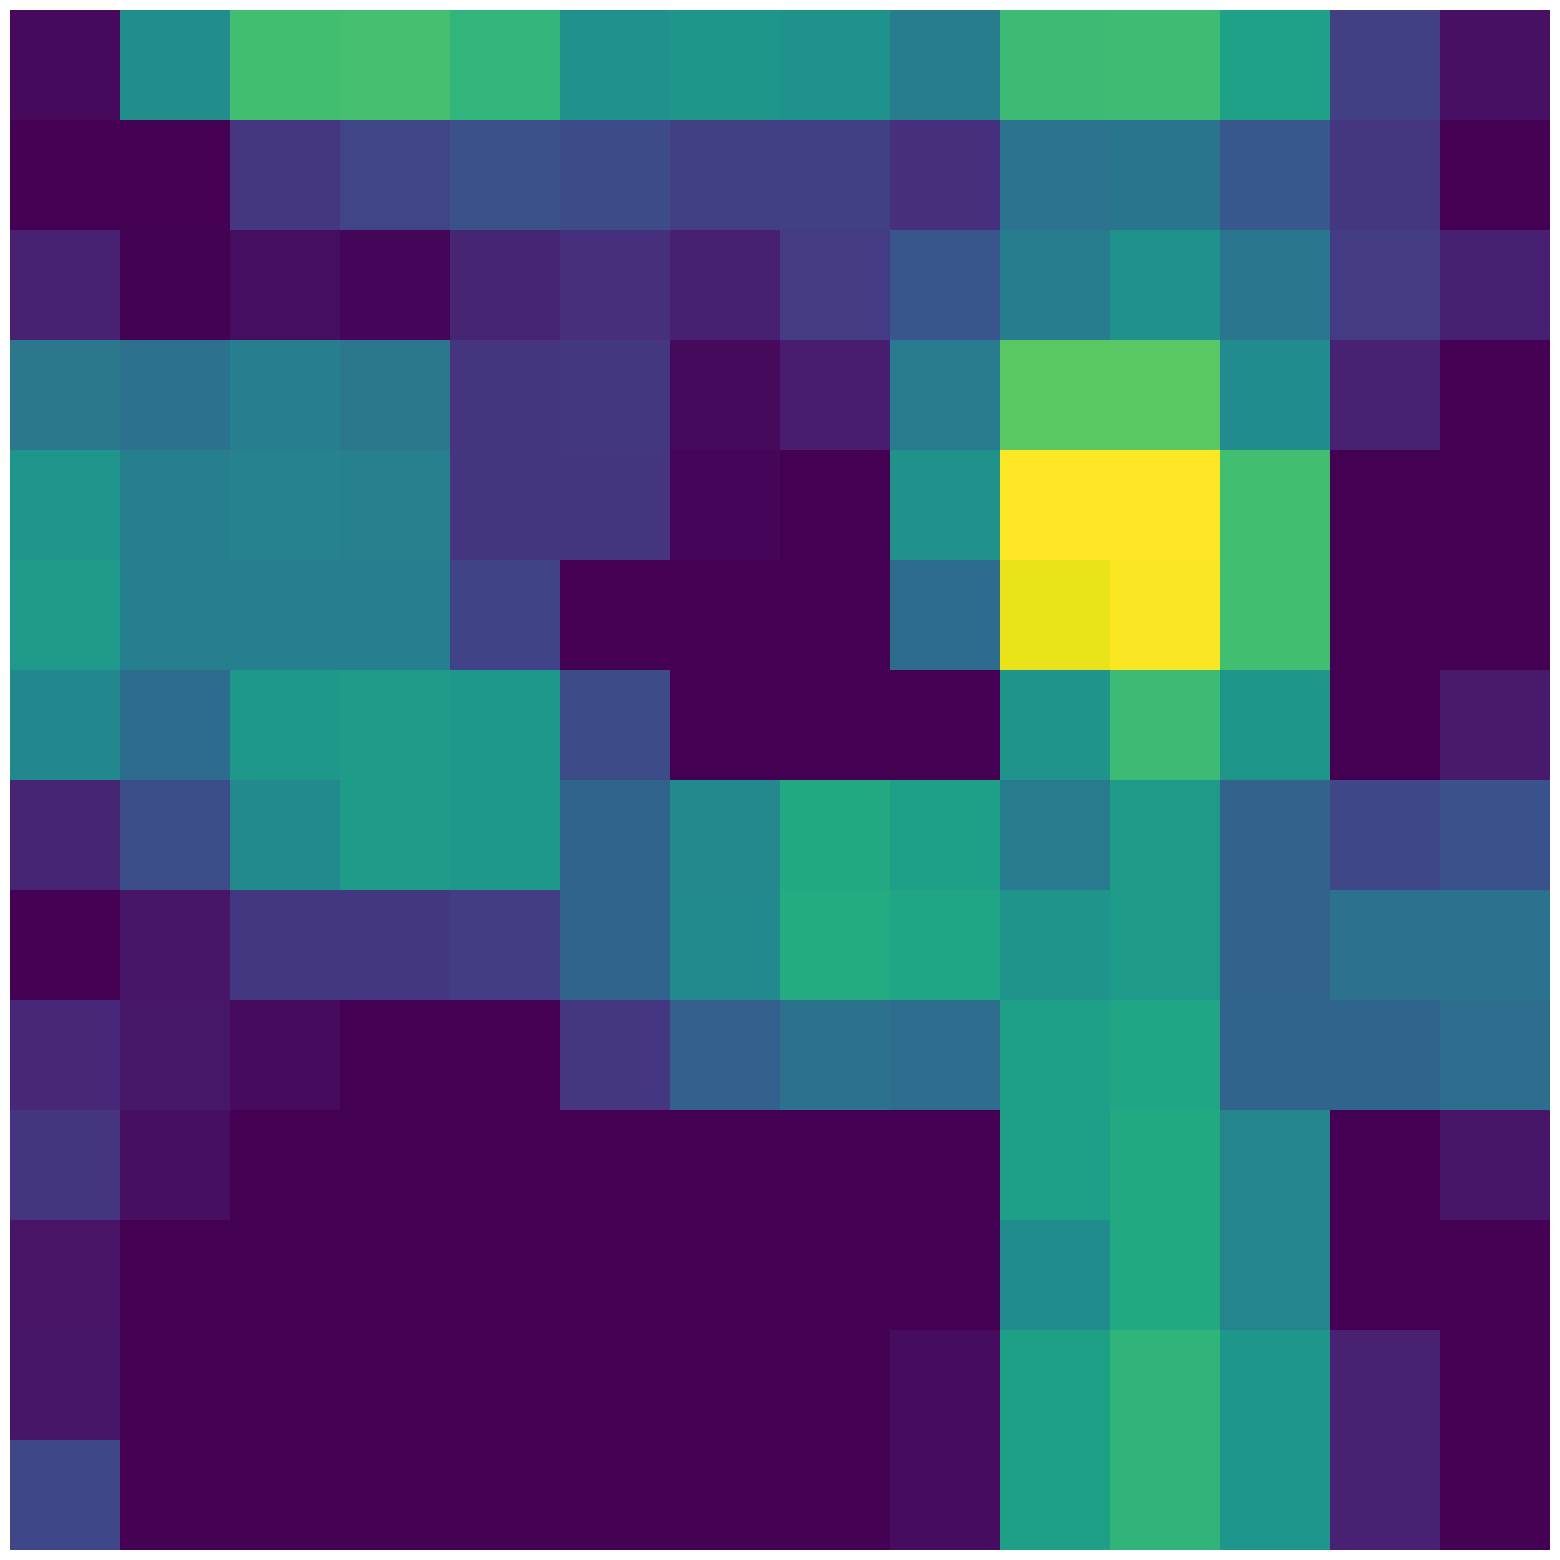

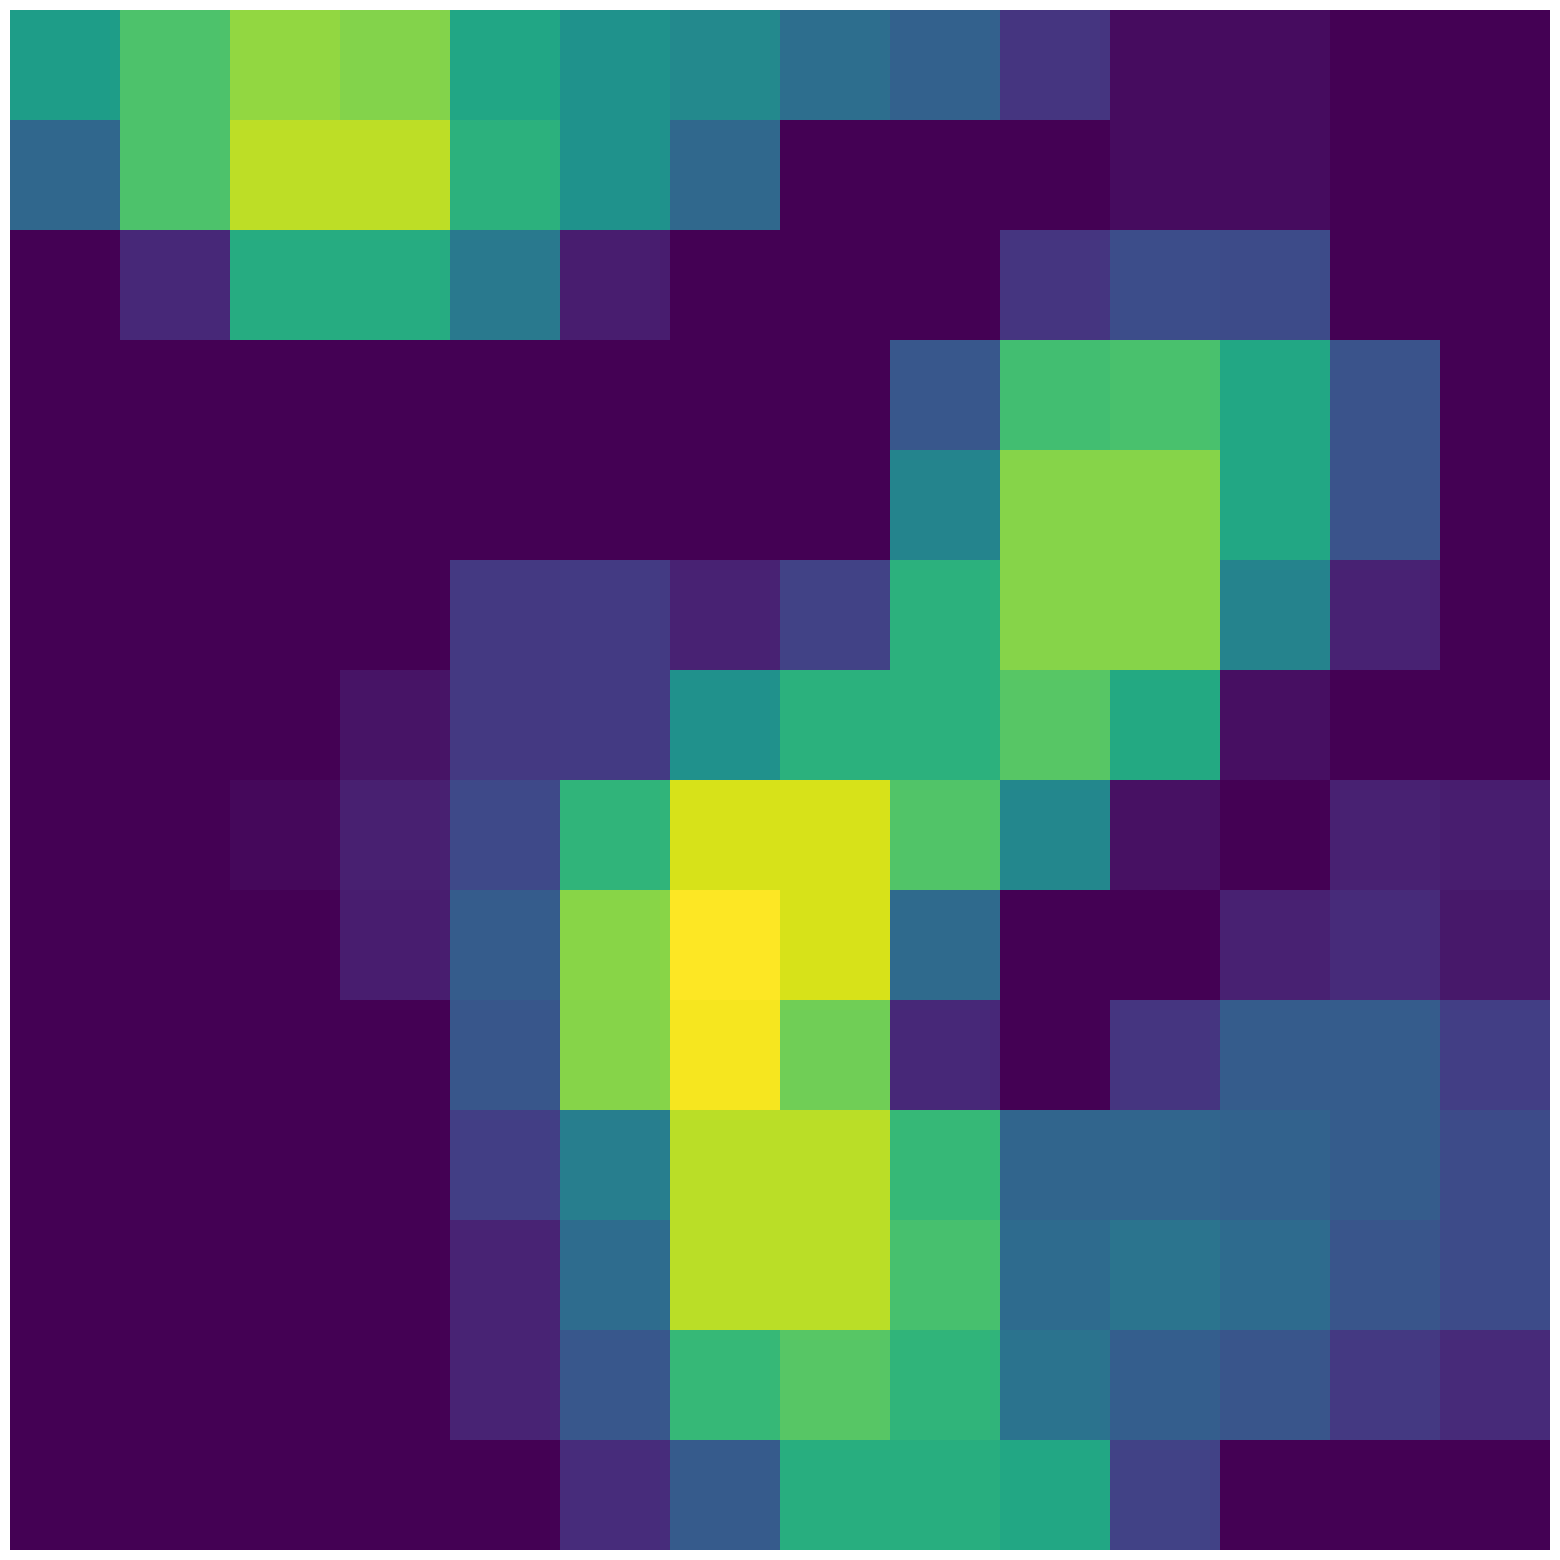

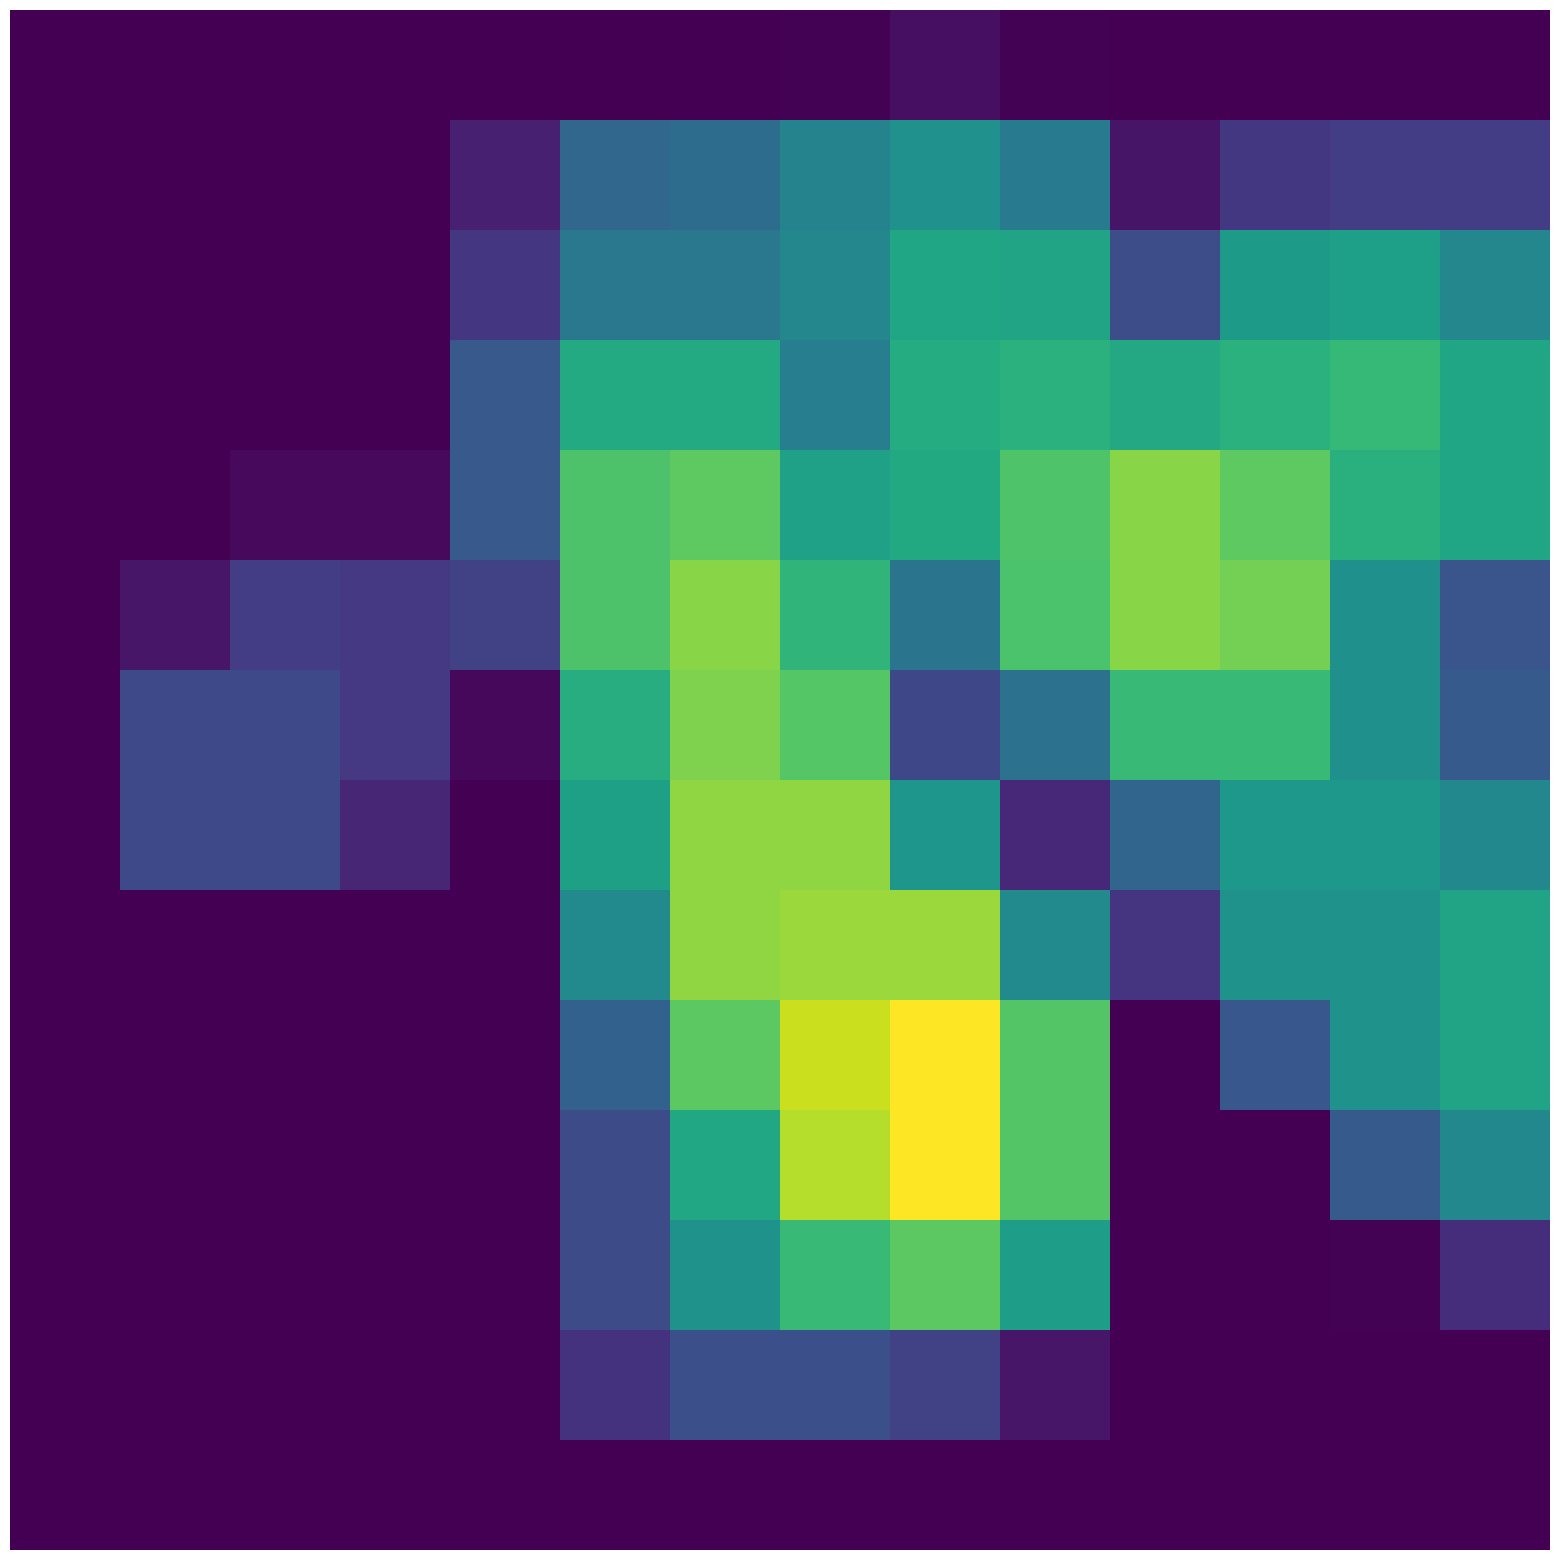

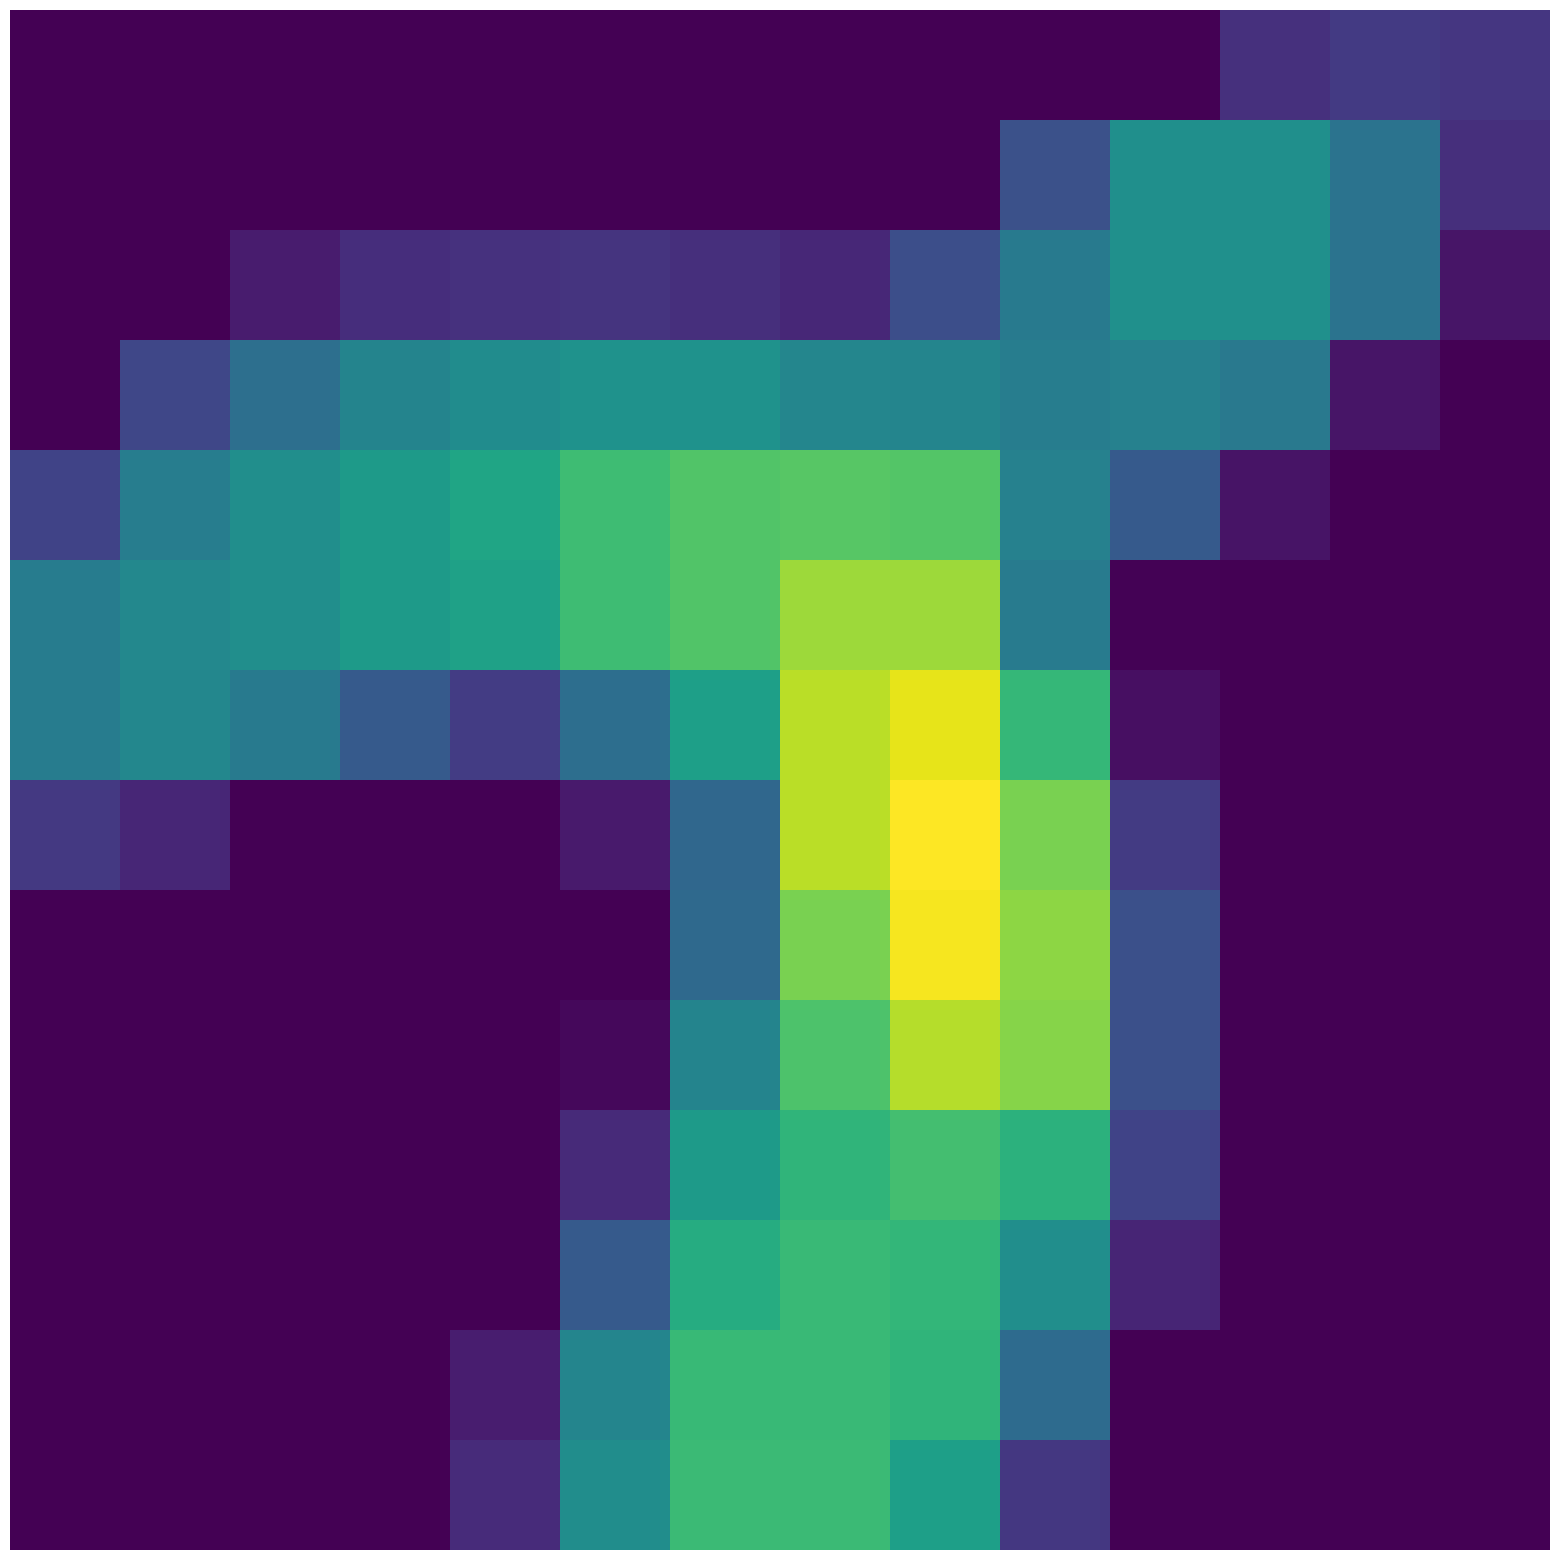

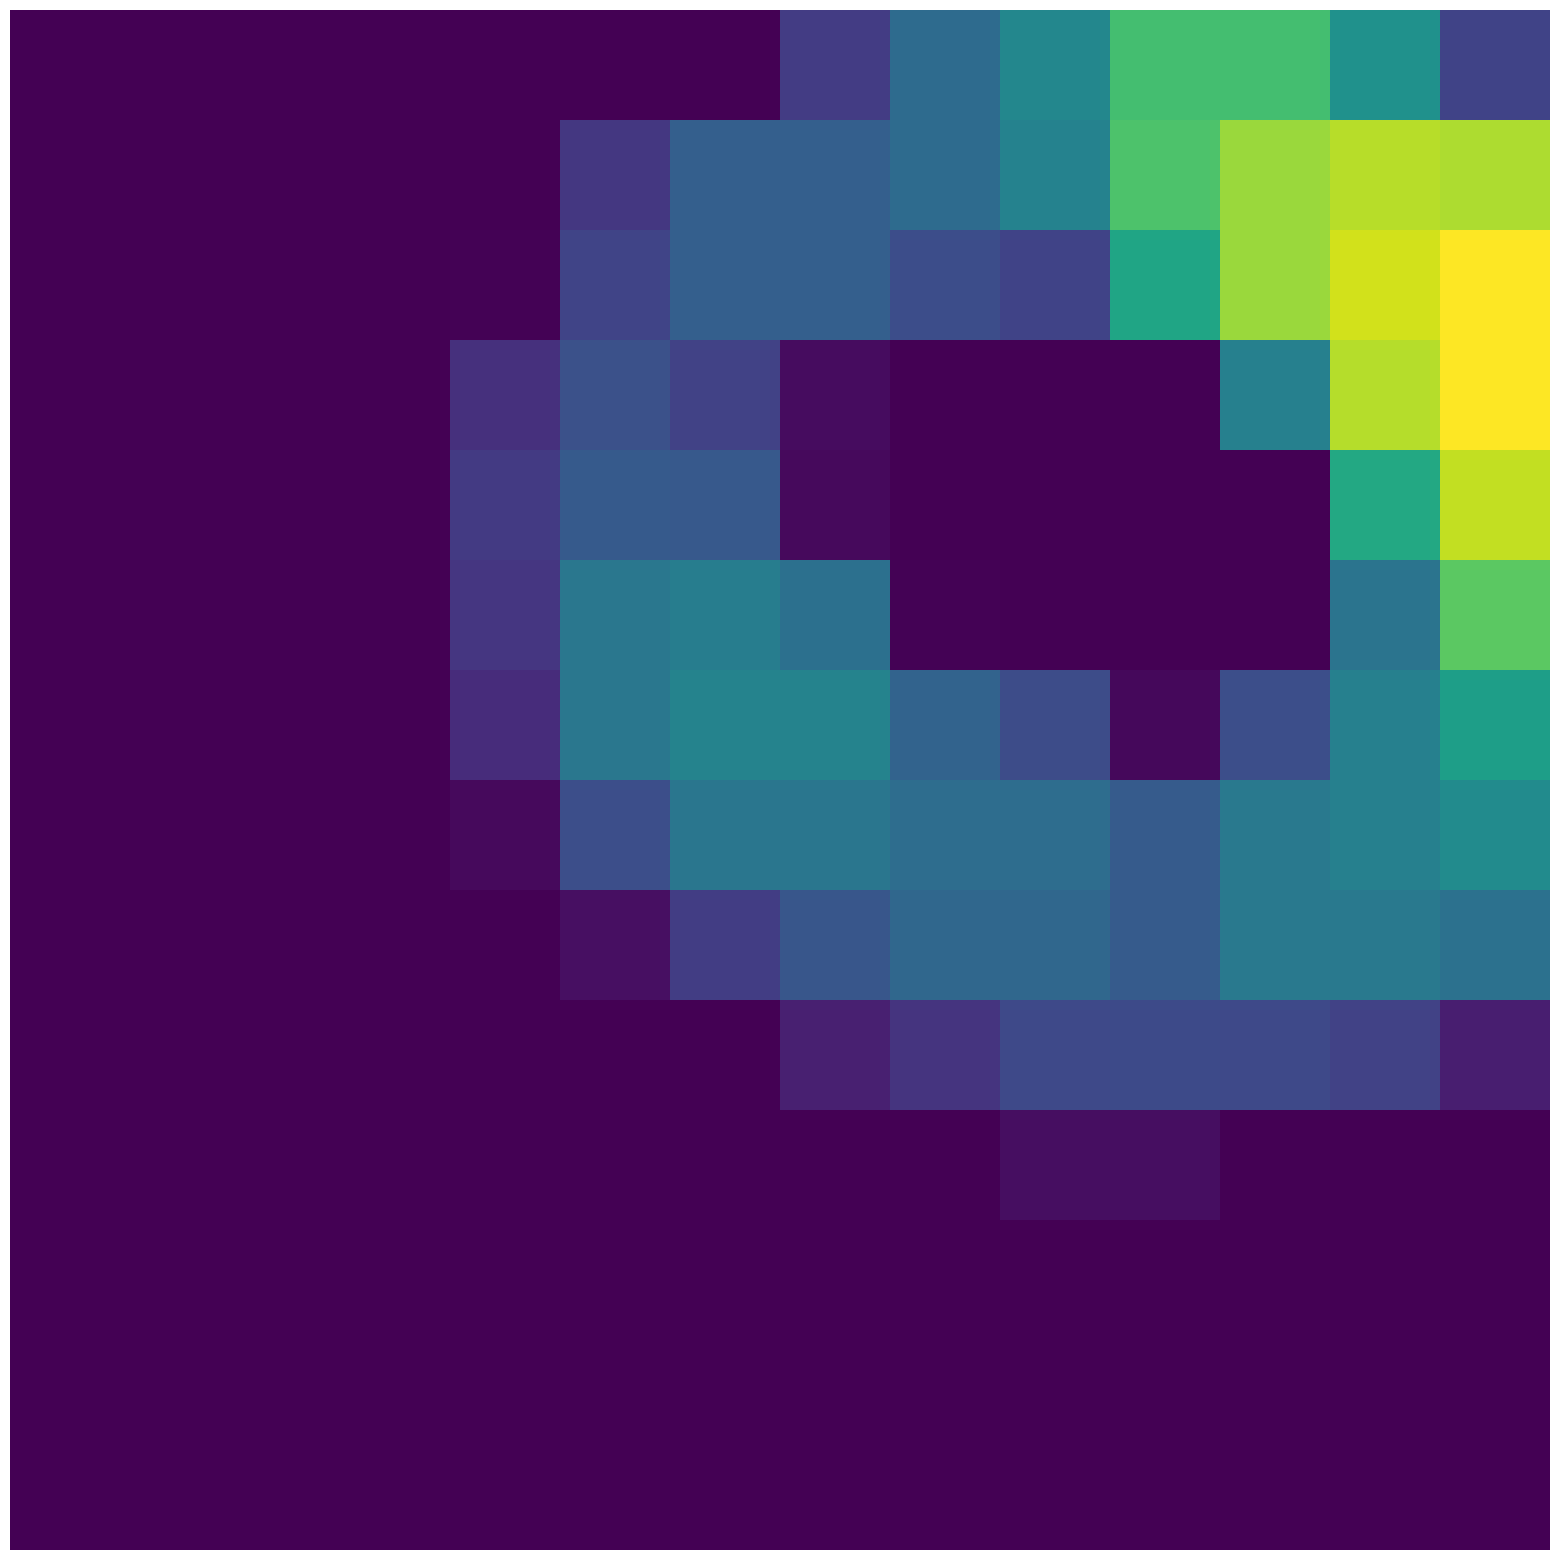

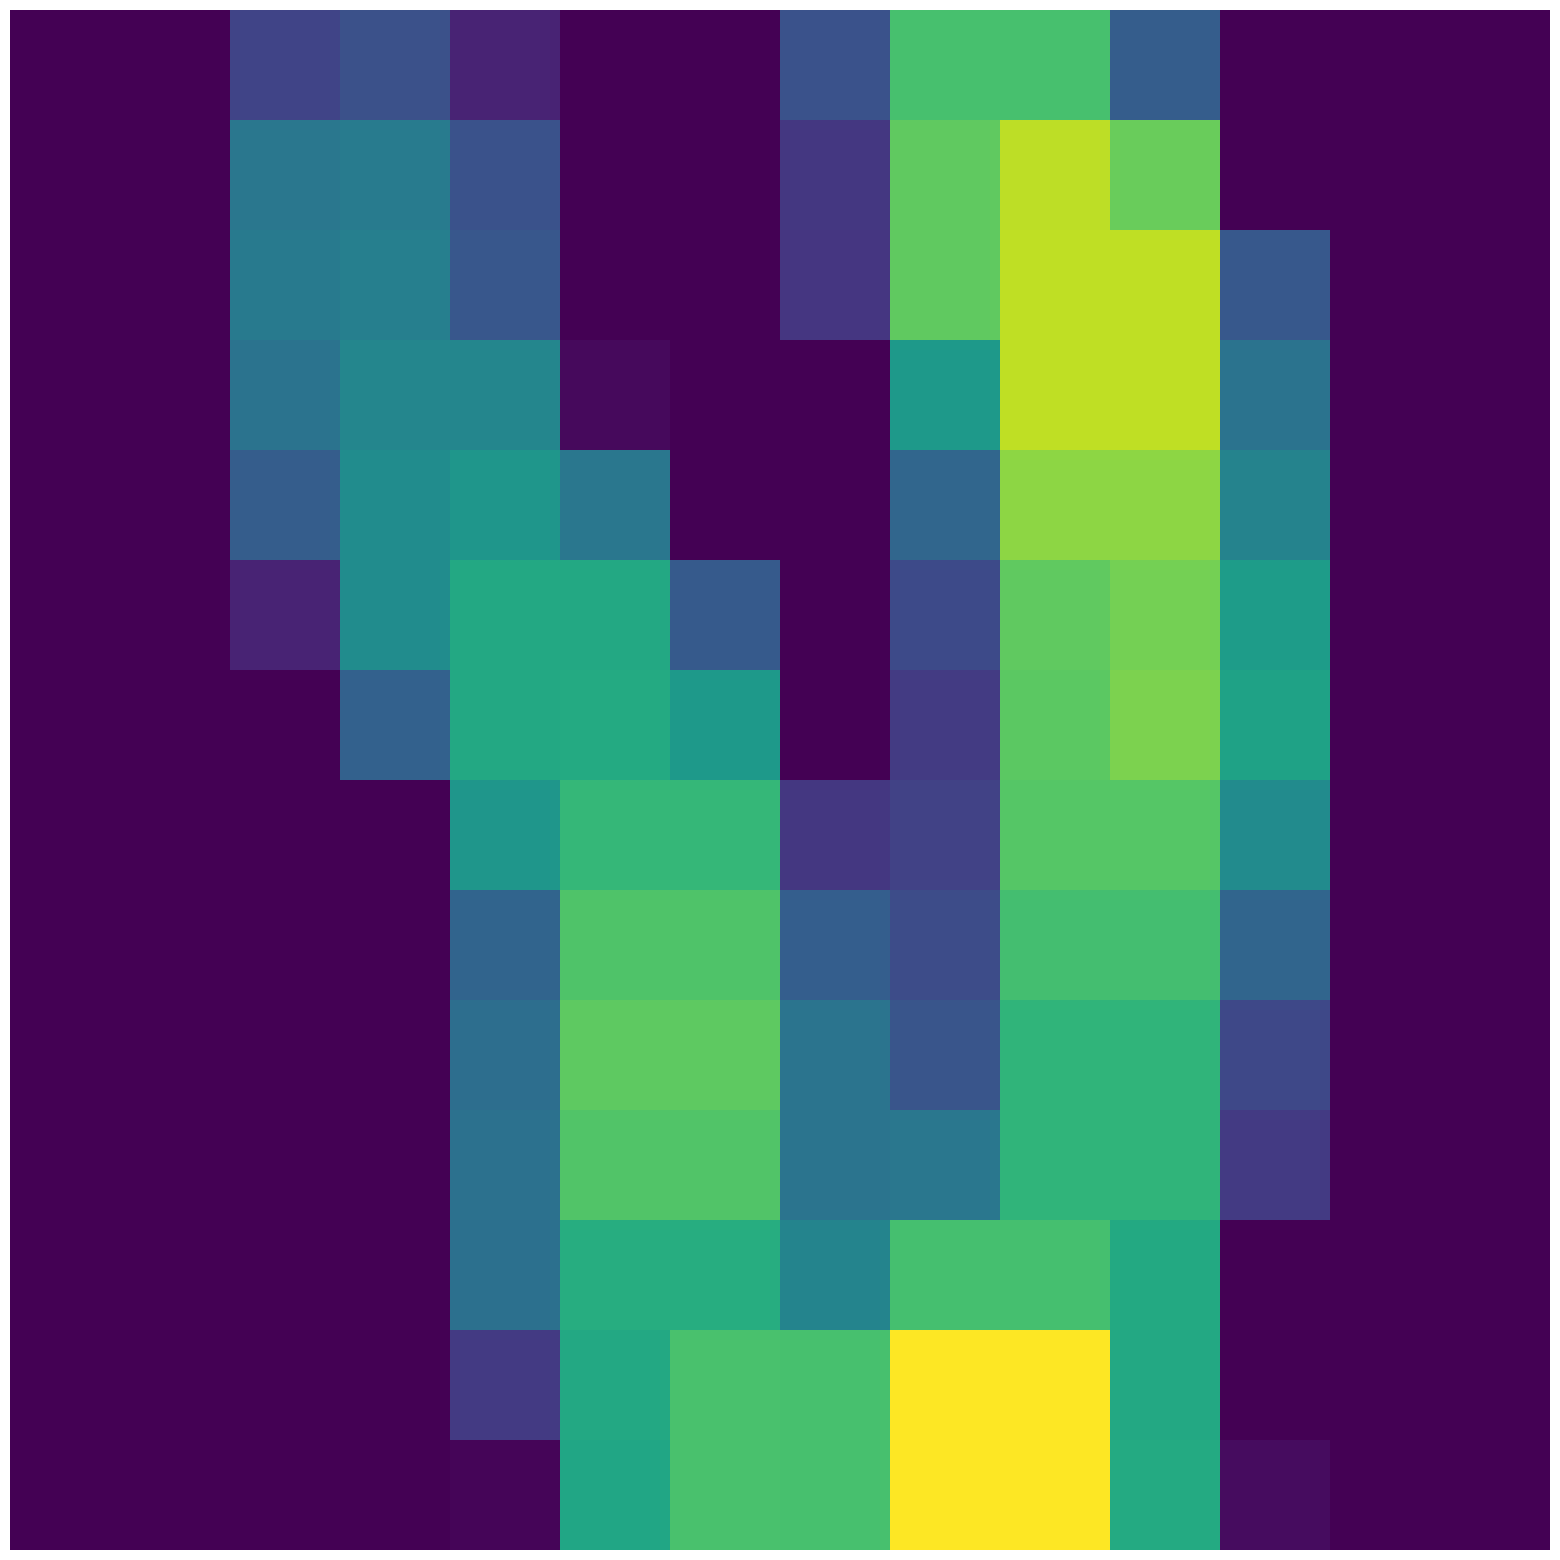

In [17]:
for letter, coords in thank_you_dict.items():
    print(letter)
    if len(coords) == 0:
        print('No image given')
        continue

    feature = get_feature_map(*coords)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(feature)
    ax.axis('off')
    fig.savefig(f'../data/figures/thank_you/{letter.upper()}.png')

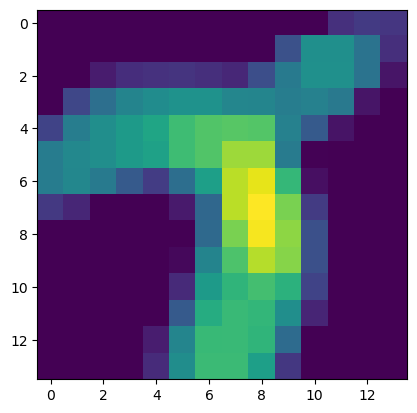

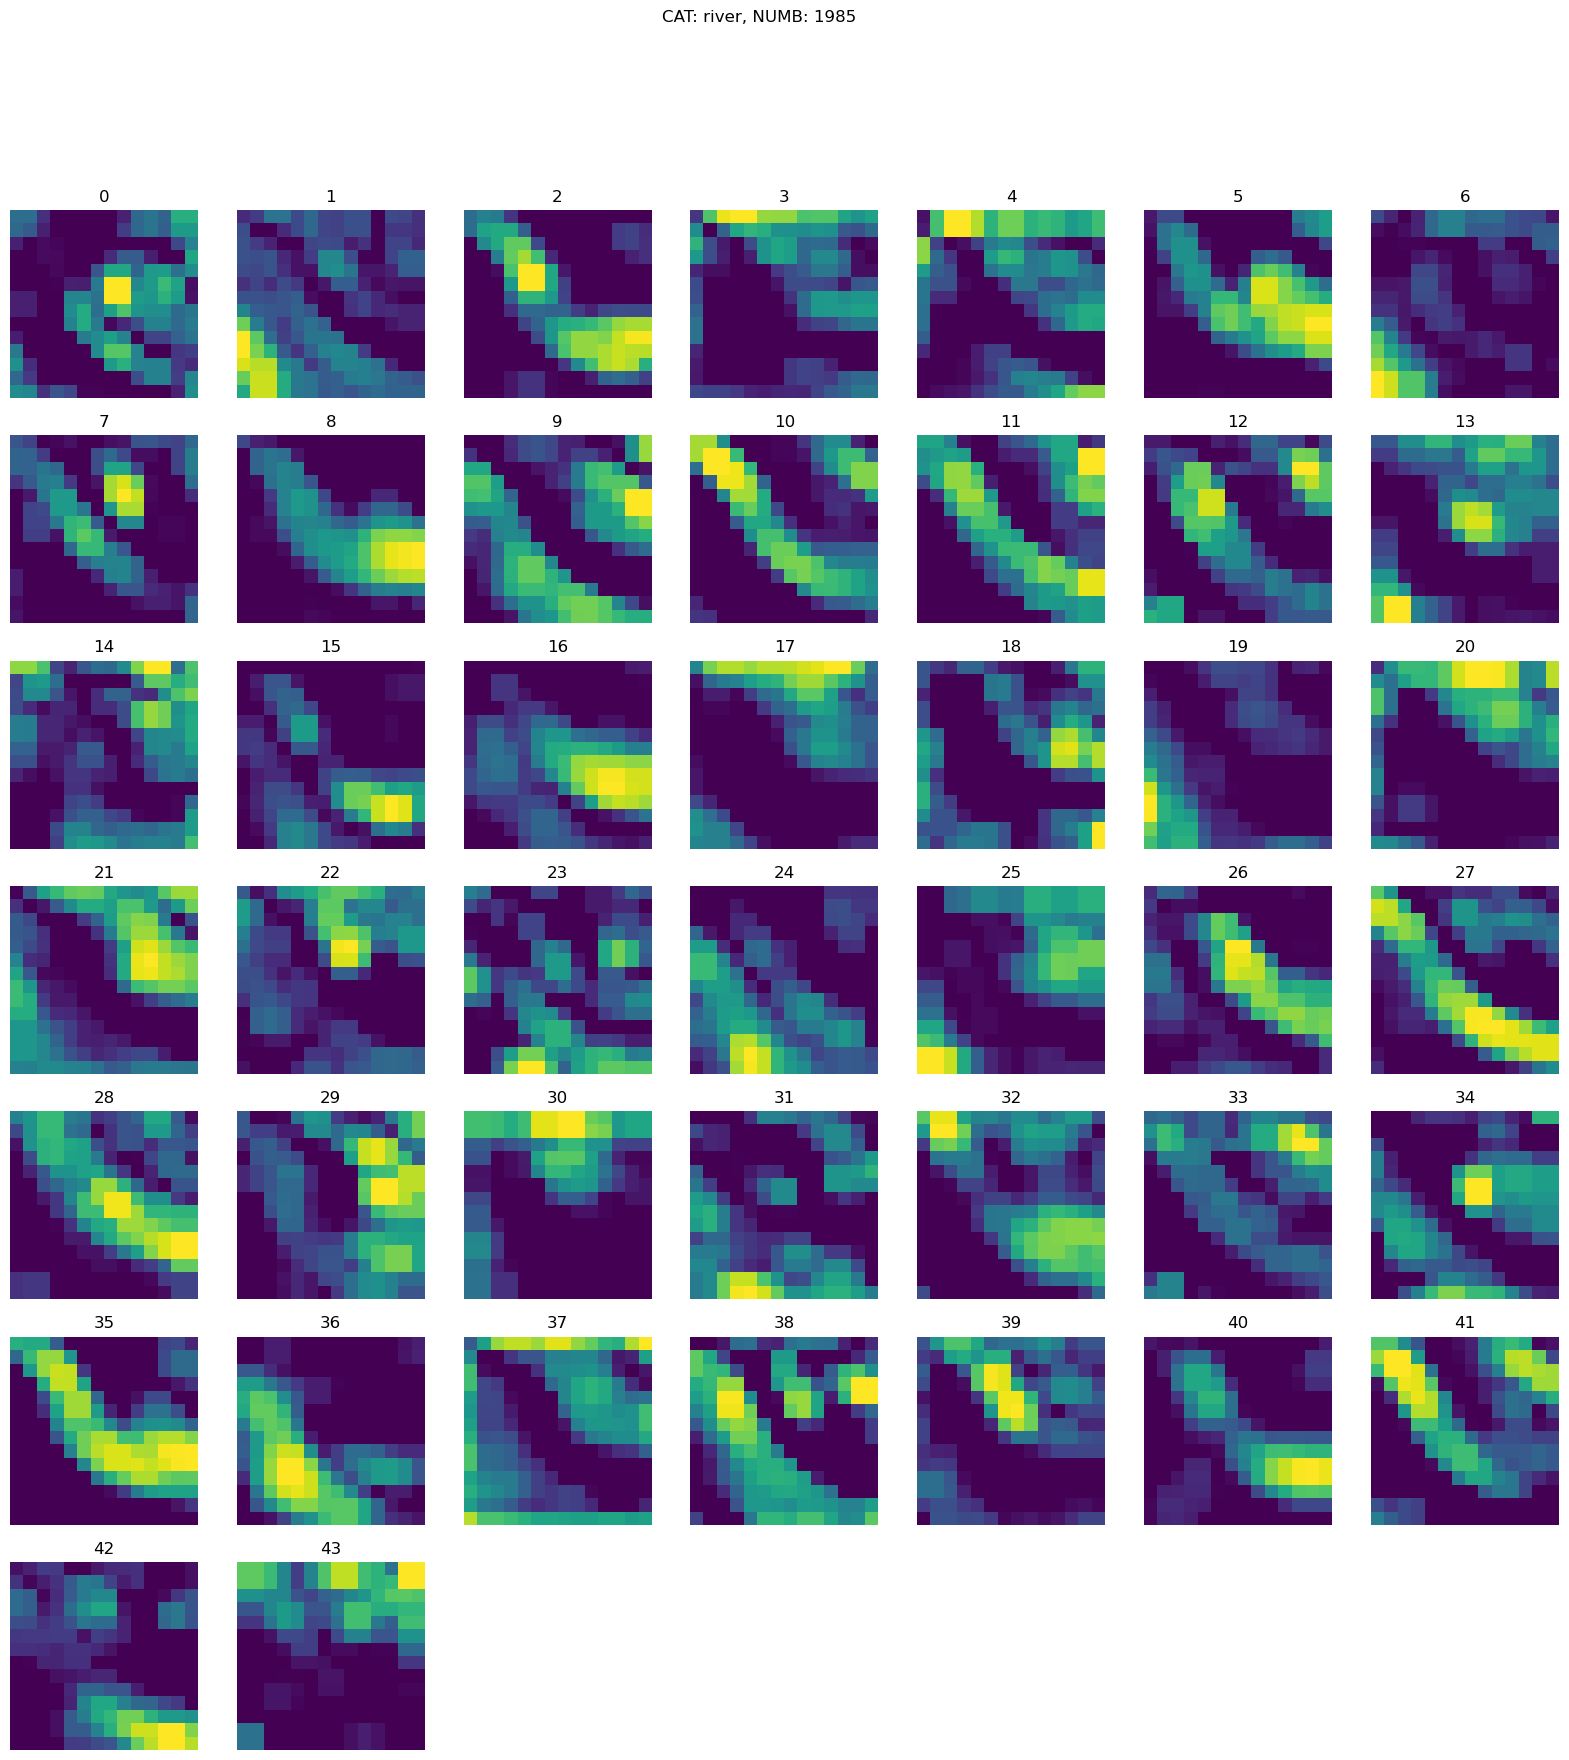

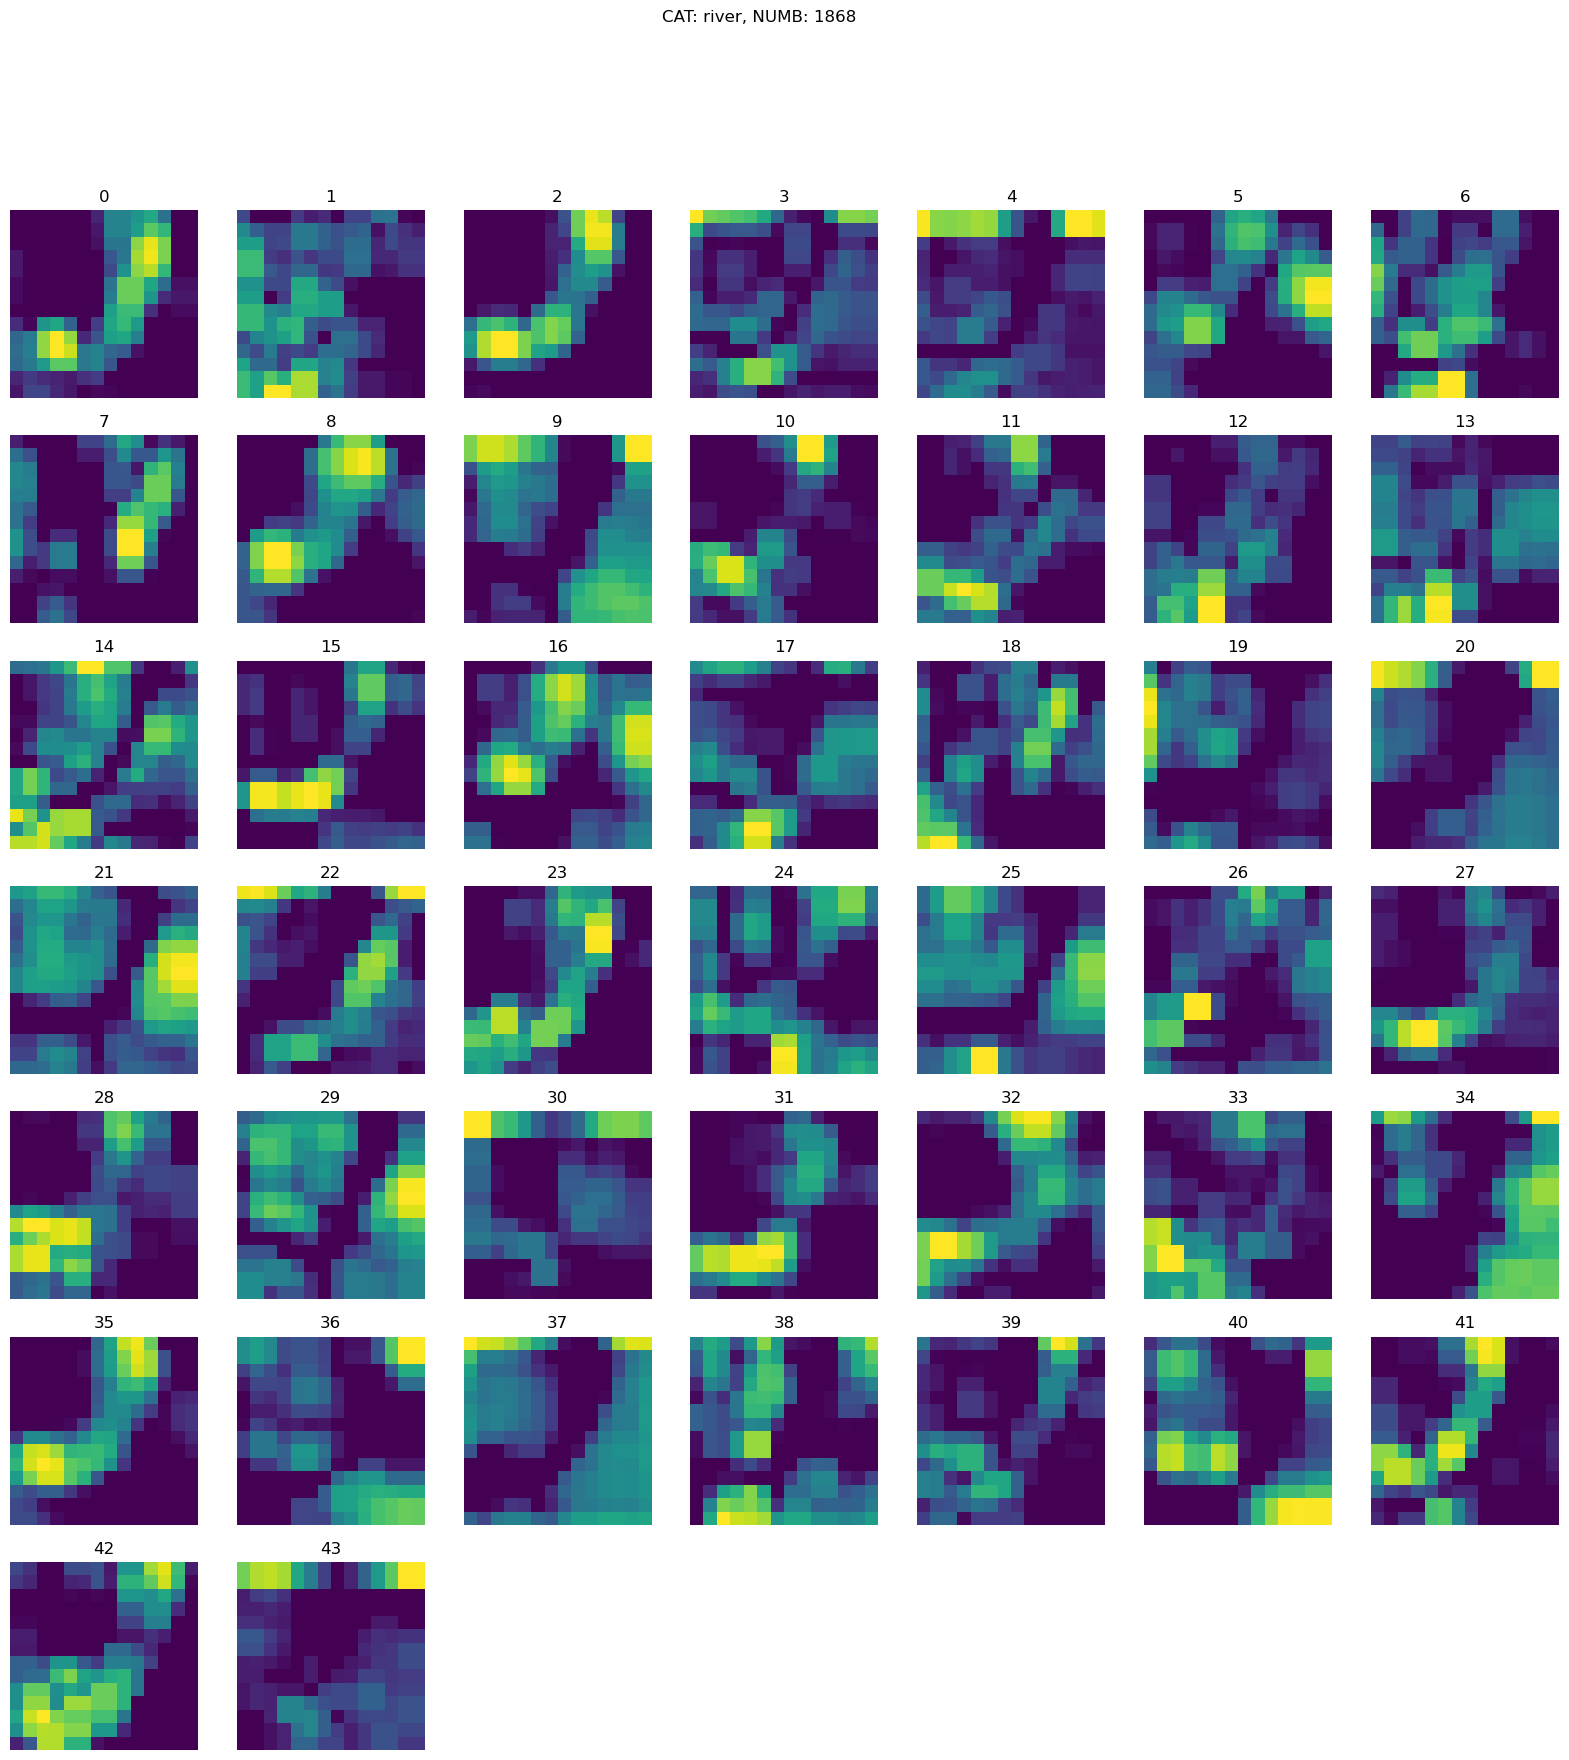

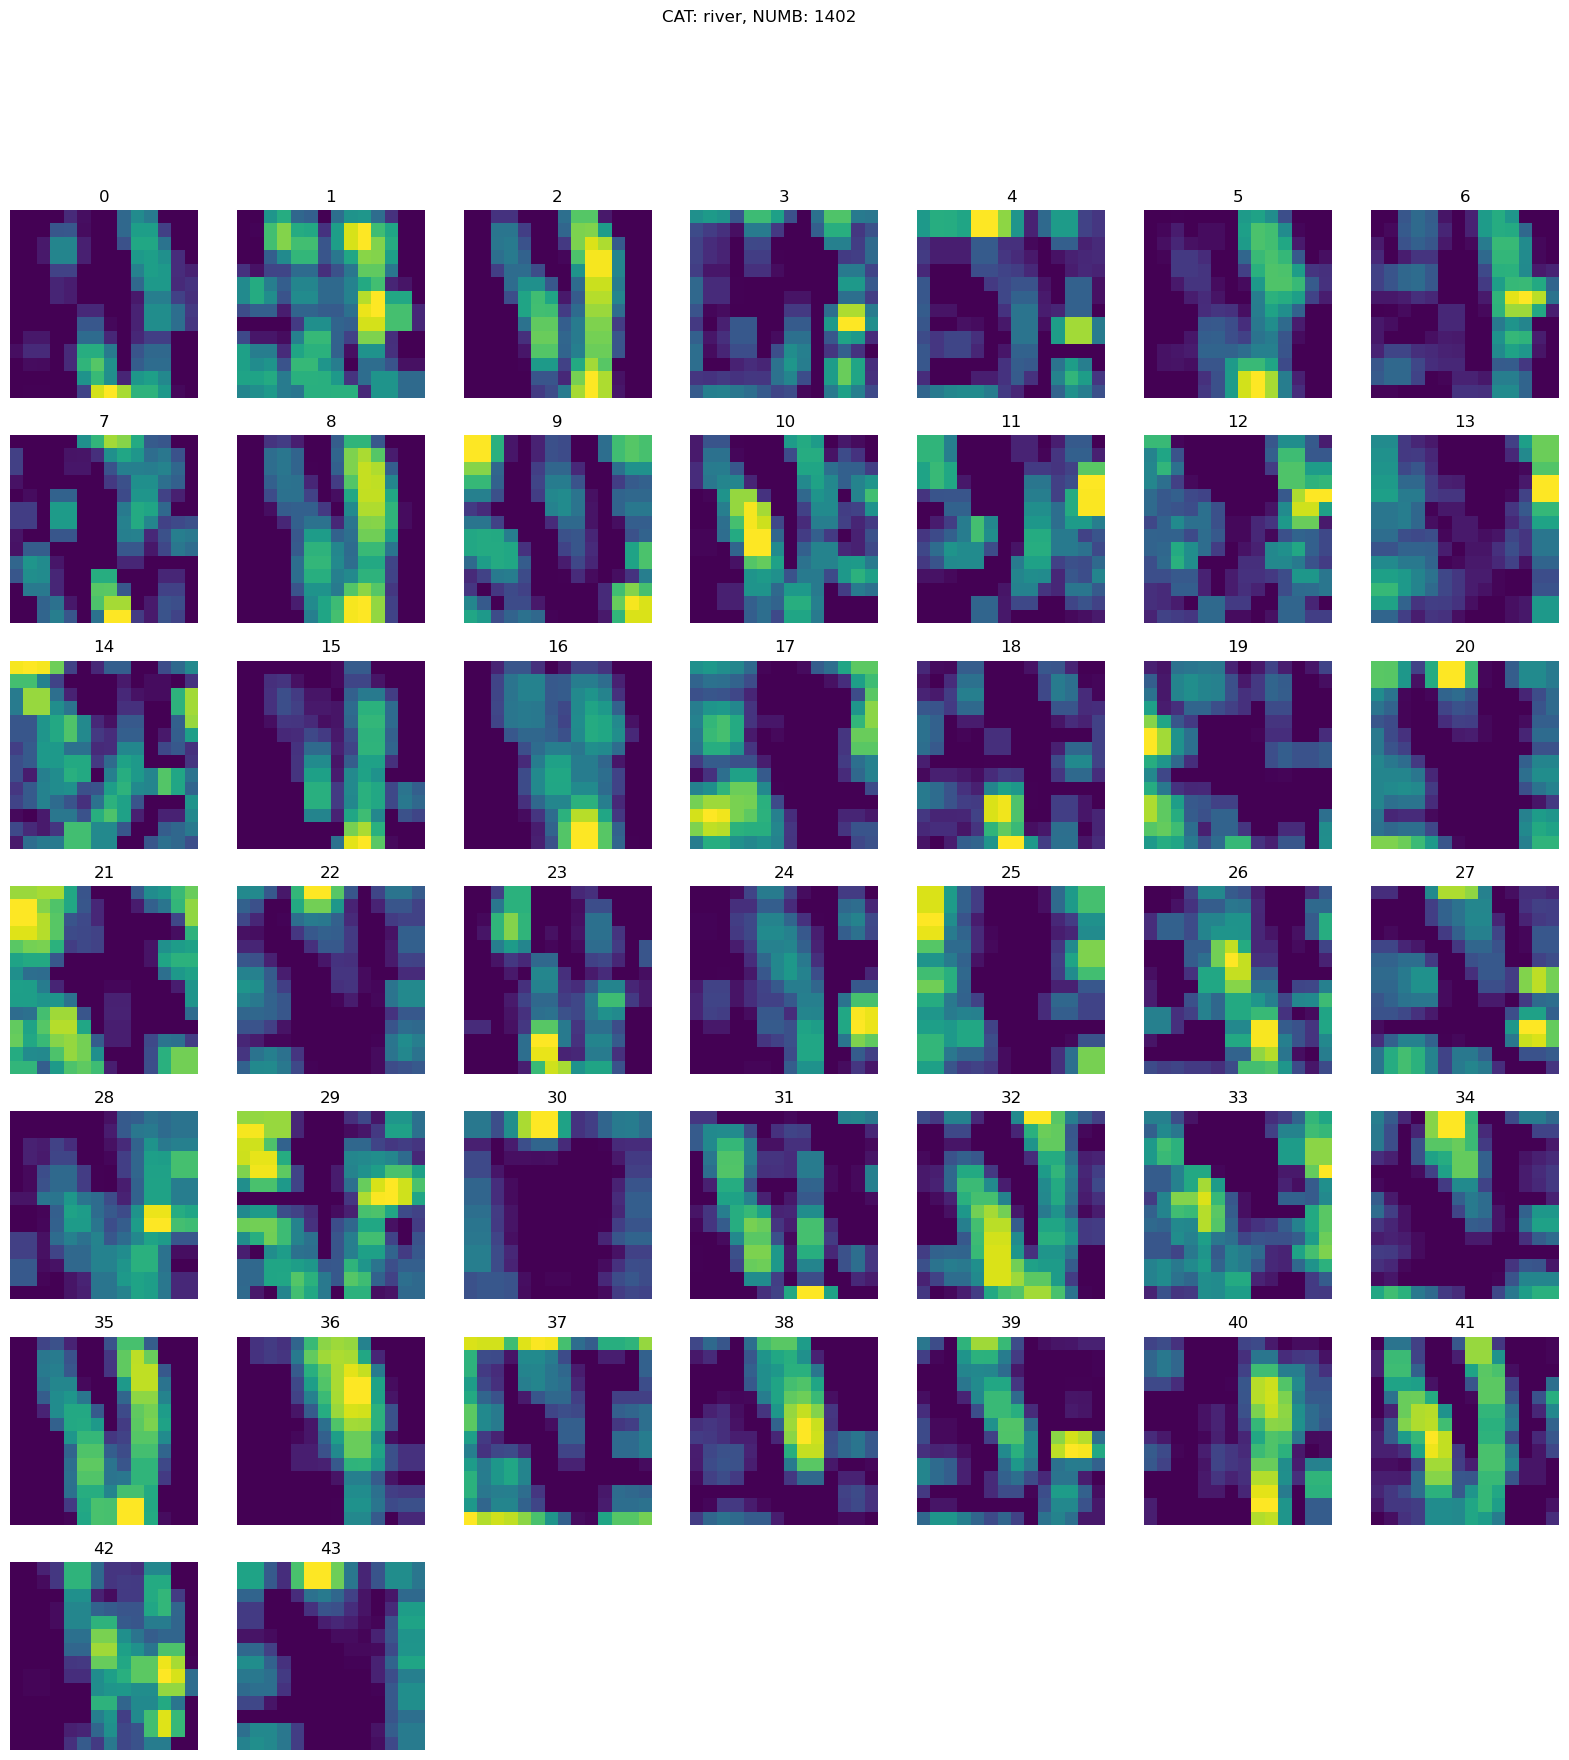

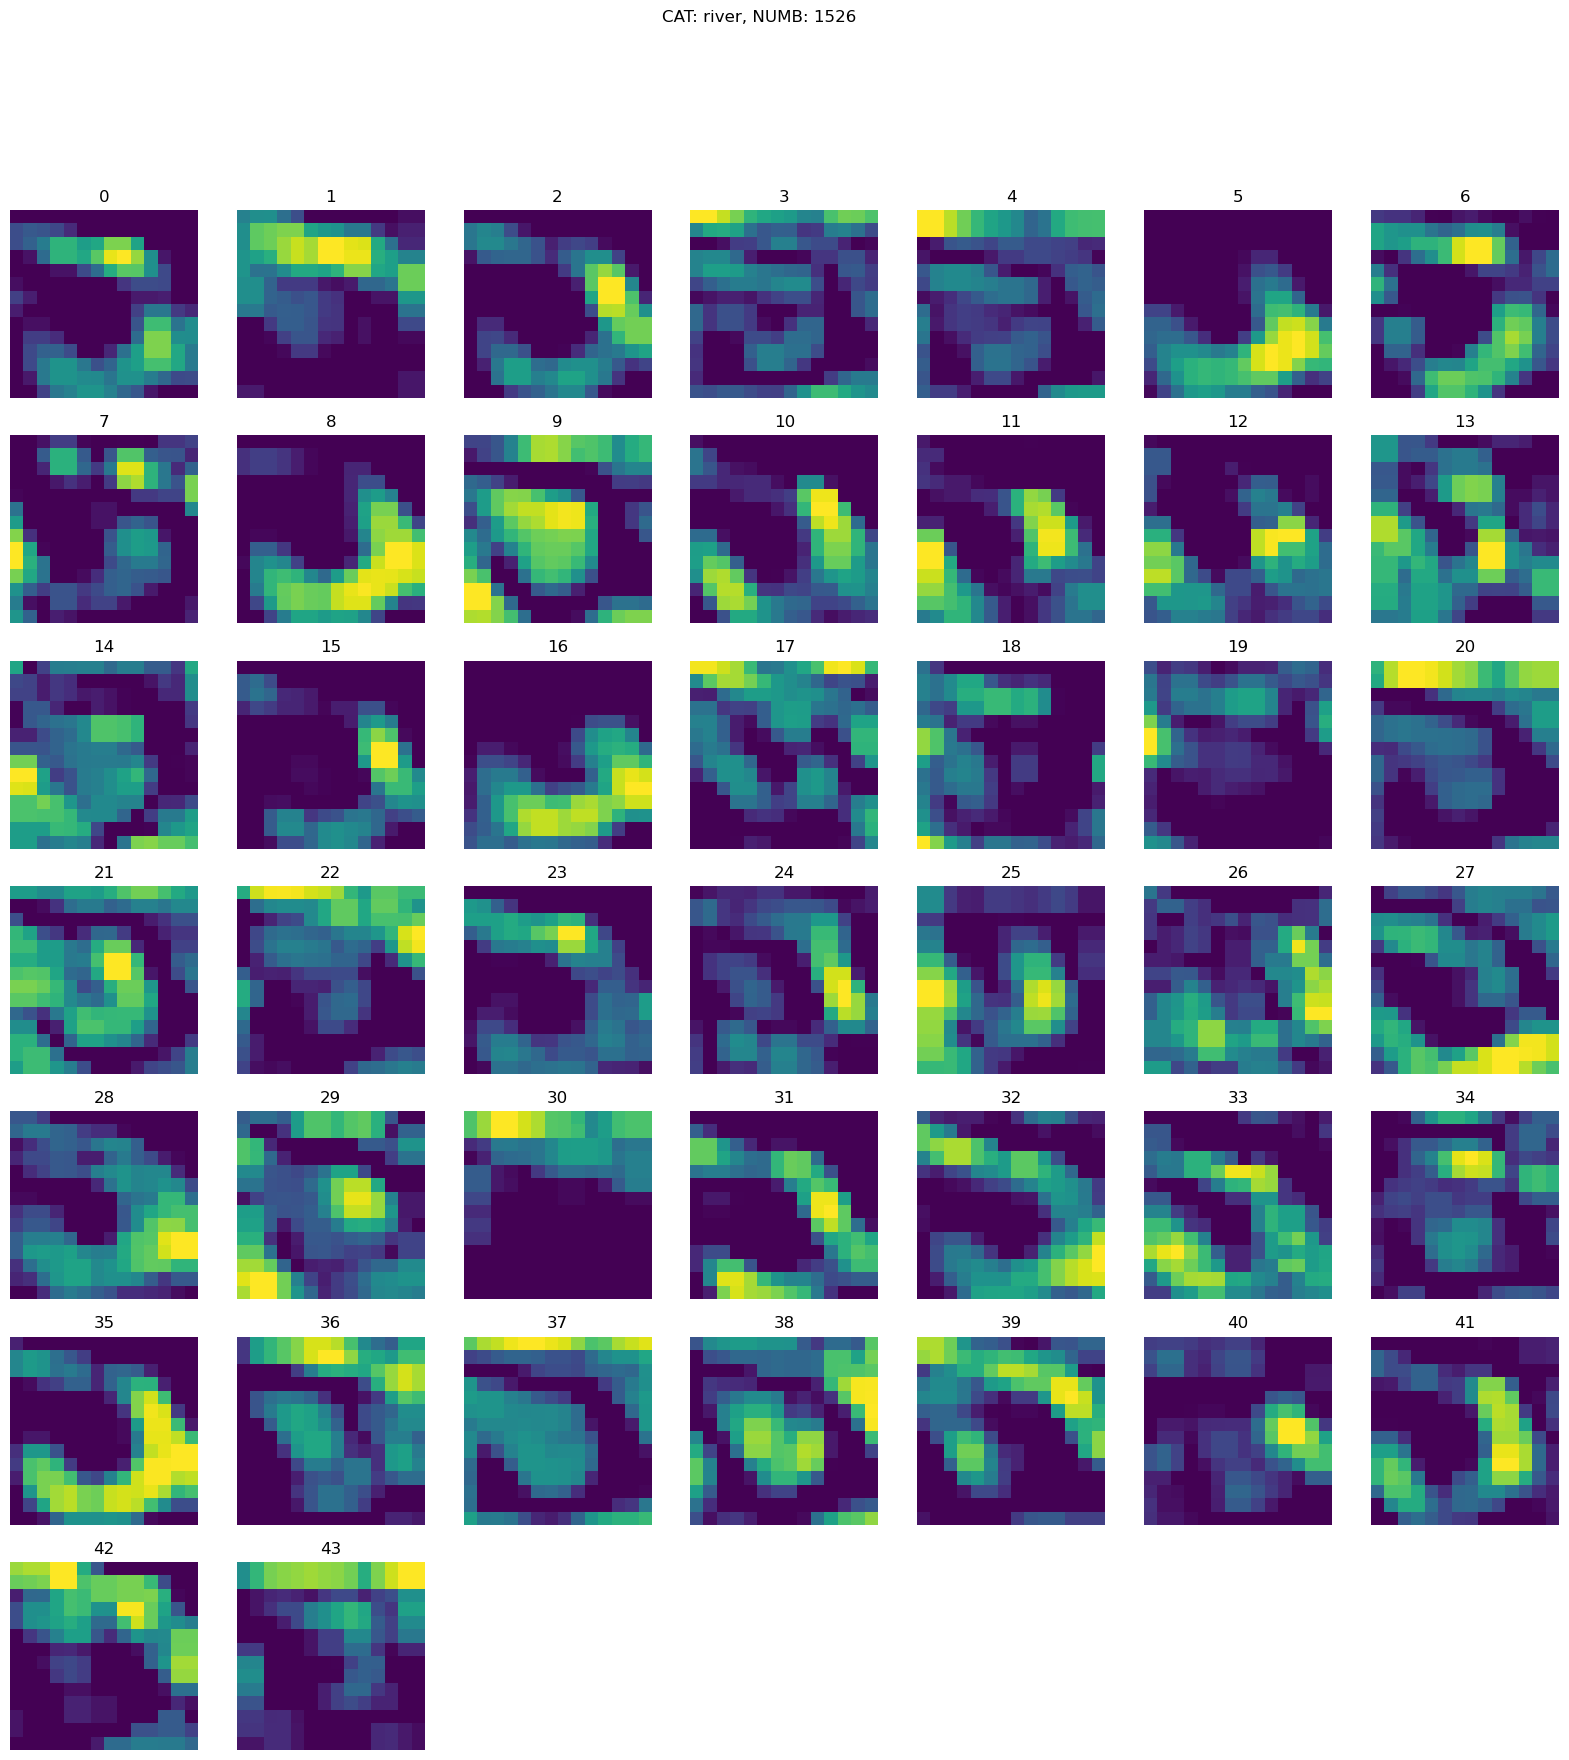

In [51]:
for category, numbers in candidate_dict.items():
    for number in numbers:
        if Path(f'../data/figures/thank_you/{category}_{number}.png').exists():
            continue
        fig = feature_map(category, number)
        fig.suptitle(f'CAT: {category}, NUMB: {number}')
        fig.savefig(f'../data/figures/thank_you/{category}_{number}.png')

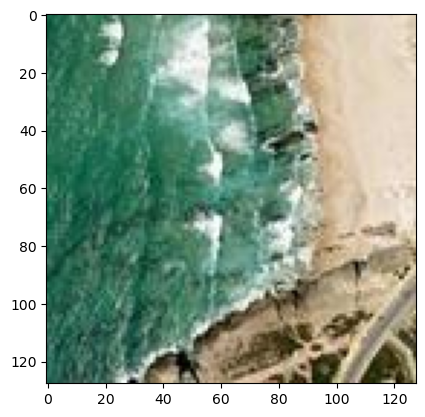

In [28]:
plt.imshow(train_set[0][0].cpu().numpy().transpose(1,2,0))